### Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.


1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

1.2  Do you think scaling is necessary for clustering in this case? Justify

1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

Dataset for Problem 1: bank_marketing_part1_Data.csv

#### Data Dictionary for Market Segmentation:

##### spending: Amount spent by the customer per month (in 1000s)
##### advance_payments: Amount paid by the customer in advance by cash (in 100s)
##### probability_of_full_payment: Probability of payment done in full by the customer to the bank
##### current_balance: Balance amount left in the account to make purchases (in 1000s)
##### credit_limit: Limit of the amount in credit card (10000s)
##### min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
##### max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

### Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations

Dataset for Problem 2: insurance_part2_data-1.csv

#### Attribute Information:

##### 1. Target: Claim Status (Claimed)
##### 2. Code of tour firm (Agency_Code)
##### 3. Type of tour insurance firms (Type)
##### 4. Distribution channel of tour insurance agencies (Channel)
##### 5. Name of the tour insurance products (Product)
##### 6. Duration of the tour (Duration)
##### 7. Destination of the tour (Destination)
##### 8. Amount of sales of tour insurance policies (Sales)
##### 9. The commission received for tour insurance firm (Commission)
##### 10. Age of insured (Age)

<span style="color:blue; font-family:Calibri; text-align:center; font-size:2em;">****Problem 1: Clustering**** </span>


<span style="color:blue; font-family:Calibri; text-align:center; font-size:2em;"> **1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis)** </span>

In [2]:
# importing the required libraries  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
%matplotlib inline
from sklearn.cluster import KMeans 
import warnings
warnings.filterwarnings('ignore')


In [2]:
# importing the dataset

import os
os.getcwd()

'/home/jovyan/demo'

In [3]:
df=pd.read_csv('/home/jovyan/demo/bank_marketing_part1_Data.csv')

In [4]:
# Checking the dataset, datatypes, missing values, statistical descriptions
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [6]:
# No null values, the datatypes are also correct
df.isnull().sum().any()

False

In [7]:
# Checking duplicate rows and found that there are no duplicate value
df[df.duplicated()]

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping


In [8]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [9]:
# Data Visualization - Univariabe, Multivariate analysis

In [10]:
# Checking if there are Outliers

df_stat = df.describe().T

In [11]:
# Defining outlier detection function

def Outlierdetection(df_stat):
    if (((df_stat['75%']-df_stat['25%'])*1.5 + df_stat['75%'])<df_stat['max']) or (df_stat['min']<(df_stat['25%']-(df_stat['75%']-df_stat['25%'])*1.5)):
        a='Yes'
    else :
        a='No'
    return a

In [12]:
df_stat['Outliers present'] =  df_stat.apply(Outlierdetection, axis=1)

In [13]:
df_stat

,count,mean,std,min,25%,50%,75%,max,Outliers present
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800,No
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500,No
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183,Yes
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750,No
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330,No
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560,Yes
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500,No


In [14]:
# Univariate Analysis

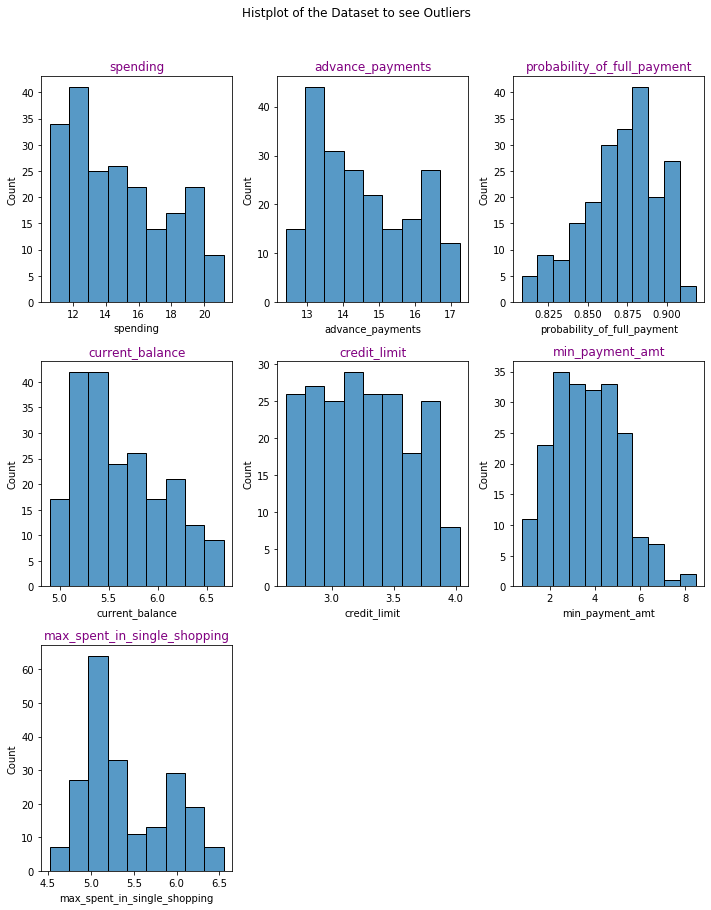

In [15]:
# Plotting Histplot to see if there are any outlier in any of the Columns
fig=plt.figure(figsize=(10,12))
fig.suptitle('Histplot of the Dataset to see Outliers', y=1.05)
for i in range(0,df.shape[1]):
    ax=fig.add_subplot(3,3,i+1)
    sns.histplot(df[df.columns[i]])
    ax.set_title(df.columns[i], color='purple')
    
plt.tight_layout()
plt.show()

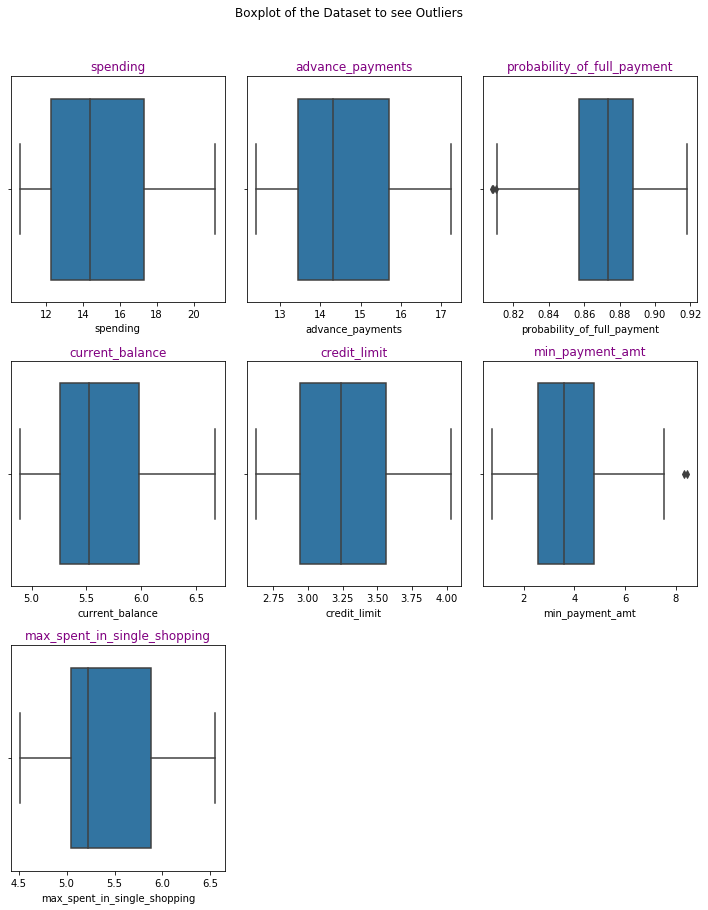

In [16]:
# Plotting Boxplot to see if there are any outlier in any of the Columns
fig=plt.figure(figsize=(10,12))
fig.suptitle('Boxplot of the Dataset to see Outliers', y=1.05)
for i in range(0,df.shape[1]):
    ax=fig.add_subplot(3,3,i+1)
    sns.boxplot(df[df.columns[i]])
    ax.set_title(df.columns[i], color='purple')
    
plt.tight_layout()
plt.show()

In [17]:
# As per above Outlier calculation and boxplot, it is found that only 2 columns have some outliers. They are Column - probability_of_full_payment
# and min_payment_amt. We can replace the Outlier with the max value.
IQR = df_stat.loc['probability_of_full_payment','75%']-df_stat.loc['probability_of_full_payment','25%']
IQR1 = df_stat.loc['min_payment_amt','75%']-df_stat.loc['min_payment_amt','25%']

df['probability_of_full_payment']= np.where(df['probability_of_full_payment']<(df_stat.loc['probability_of_full_payment','25%']-1.5*IQR), (df_stat.loc['probability_of_full_payment','25%']-1.5*IQR),df['probability_of_full_payment'])
df['min_payment_amt']= np.where(df['min_payment_amt']>(df_stat.loc['min_payment_amt','75%']+1.5*IQR1), (df_stat.loc['min_payment_amt','75%']+1.5*IQR1),df['min_payment_amt'])

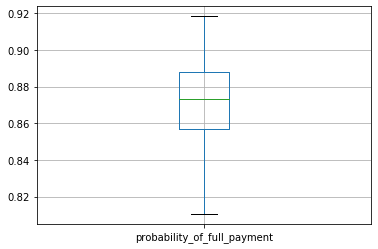

In [18]:
df.boxplot(column=['probability_of_full_payment']) 

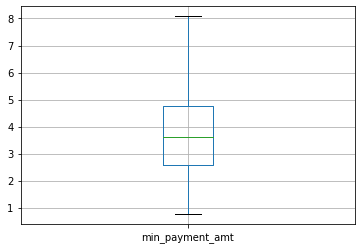

In [19]:
 df.boxplot(column=['min_payment_amt'])

<Figure size 1008x720 with 0 Axes>

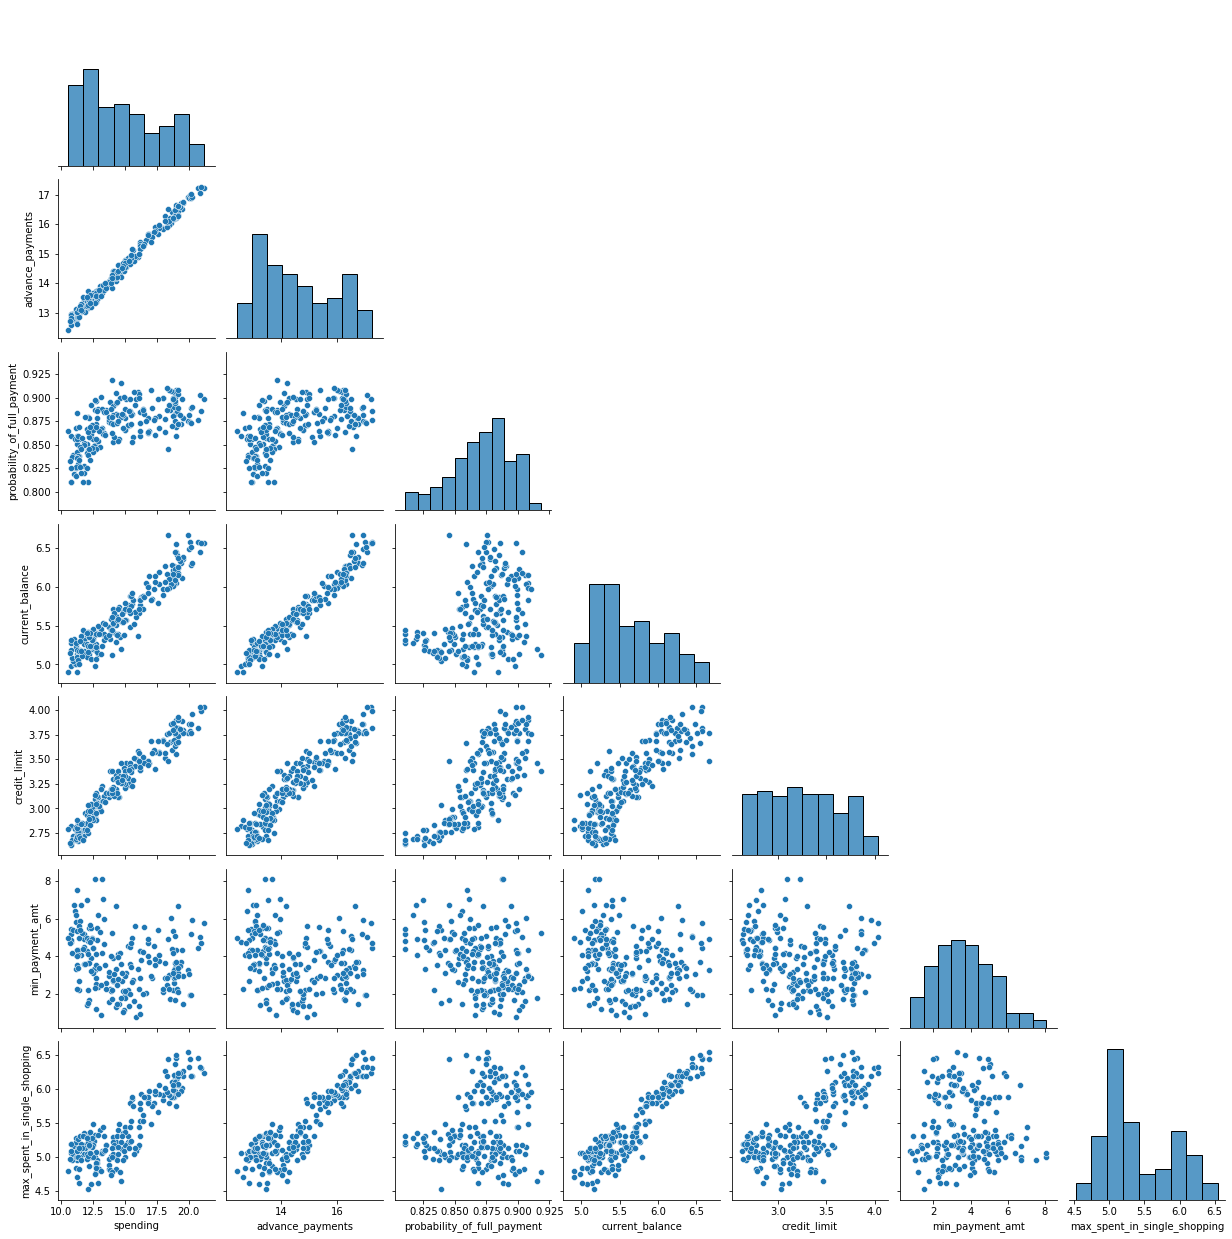

In [20]:
# Doing the multivariate analysis using scatter plot.

plt.figure(figsize=(14,10))
sns.pairplot(df, corner=1)



In [21]:
# Looking at the heatmap
df_corr = df.corr()
df_corr

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608900,0.949985,0.970771,-0.229619,0.863693
advance_payments,0.994341,1.000000,0.529925,0.972422,0.944829,-0.217051,0.890784
probability_of_full_payment,0.608900,0.529925,1.000000,0.368419,0.762218,-0.335071,0.227140
current_balance,0.949985,0.972422,0.368419,1.000000,0.860415,-0.170701,0.932806
credit_limit,0.970771,0.944829,0.762218,0.860415,1.000000,-0.258980,0.749131
min_payment_amt,-0.229619,-0.217051,-0.335071,-0.170701,-0.258980,1.000000,-0.009605
max_spent_in_single_shopping,0.863693,0.890784,0.227140,0.932806,0.749131,-0.009605,1.000000


In [22]:
# Unstacking the rows and columns to view the correlated variables
df_corr=pd.DataFrame(df_corr.unstack().sort_values()).reset_index()


In [23]:
df_corr.rename(columns={'level_0':'Var1','level_1':'Var2',0:'Corr_Coeff'}, inplace=True)

In [24]:
#Excluding the similar variables and mirror variables
df_corr = df_corr[df_corr['Var1']!=df_corr['Var2']]
df_corr['redundant_col']=df_corr.apply(lambda x: '-'.join(sorted([x['Var1'],x['Var2']])),axis=1)
df_corr = df_corr.drop_duplicates(['redundant_col'])
df_corr.sort_values(by='Corr_Coeff', ascending=False).reset_index(drop=True)

,Var1,Var2,Corr_Coeff,redundant_col
0,advance_payments,spending,0.994341,advance_payments-spending
1,current_balance,advance_payments,0.972422,advance_payments-current_balance
2,spending,credit_limit,0.970771,credit_limit-spending
3,current_balance,spending,0.949985,current_balance-spending
4,advance_payments,credit_limit,0.944829,advance_payments-credit_limit
5,current_balance,max_spent_in_single_shopping,0.932806,current_balance-max_spent_in_single_shopping
6,max_spent_in_single_shopping,advance_payments,0.890784,advance_payments-max_spent_in_single_shopping
7,max_spent_in_single_shopping,spending,0.863693,max_spent_in_single_shopping-spending
8,credit_limit,current_balance,0.860415,credit_limit-current_balance
9,credit_limit,probability_of_full_payment,0.762218,credit_limit-probability_of_full_payment


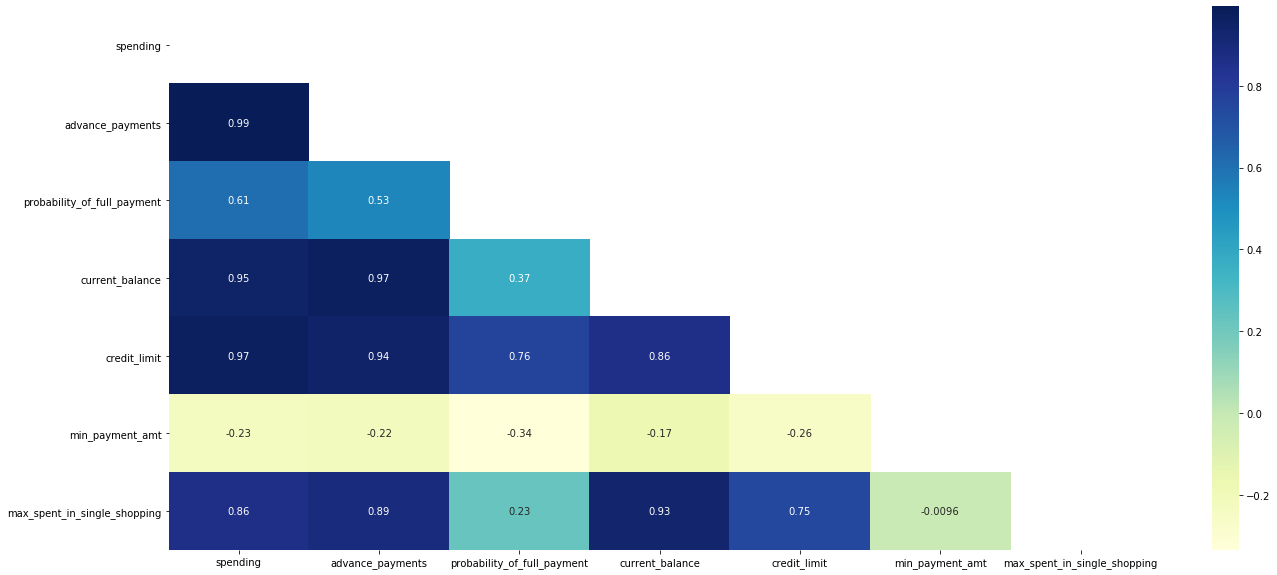

In [25]:
mask= np.triu(np.ones_like(df.corr(), dtype=np.bool)) 
plt.figure(figsize=(22, 10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', mask=mask,)

In [26]:
# As we can see there are multicollinearities present in the dataset, however as instructed in the Project FAQ the treatment of multicollinearity
# is not required for Clustering algorithms

# Checking the Skewness and Kurtosis
#If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
#If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
#If the skewness is less than -1 or greater than 1, the data are highly skewed

df.skew()

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.522793
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.360001
max_spent_in_single_shopping    0.561897
dtype: float64

In [27]:
# High kurtosis in a data set is an indicator that data has heavy outliers.
# Low kurtosis in a data set is an indicator that data has lack of outliers.
# If kurtosis value + means pointy and — means flat
df.kurt()

spending                       -1.084266
advance_payments               -1.106703
probability_of_full_payment    -0.186398
current_balance                -0.785645
credit_limit                   -1.097697
min_payment_amt                -0.218796
max_spent_in_single_shopping   -0.840792
dtype: float64

In [28]:
# Looking at the skewness and kurtosis, it seems the data is uniformly distributed with minor skewness in probability_of_full_payment 
# and max_spent_in_single_shopping

<span style="color:blue; font-family:Calibri; text-align:center; font-size:2em;"> ****1.2 Do you think scaling is necessary for clustering in this case? Justify**** </span>




In [29]:
# Checking the scale of the dataset.
df1=df.describe().T
df1['Range']=df1['max']-df1['min']
df1

,count,mean,std,min,25%,50%,75%,max,Range
spending,210.0,14.847524,2.909699,10.590000,12.27000,14.35500,17.305000,21.180000,10.590000
advance_payments,210.0,14.559286,1.305959,12.410000,13.45000,14.32000,15.715000,17.250000,4.840000
probability_of_full_payment,210.0,0.871025,0.023560,0.810588,0.85690,0.87345,0.887775,0.918300,0.107712
current_balance,210.0,5.628533,0.443063,4.899000,5.26225,5.52350,5.979750,6.675000,1.776000
credit_limit,210.0,3.258605,0.377714,2.630000,2.94400,3.23700,3.561750,4.033000,1.403000
min_payment_amt,210.0,3.697288,1.494689,0.765100,2.56150,3.59900,4.768750,8.079625,7.314525
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.519000,5.04500,5.22300,5.877000,6.550000,2.031000


In [30]:
# The scale of the data across the columns shows moderate variation. Scaling may be required
# We can do scaling using Minmax Score method as shown below due to clustering, the data will range from 0 to 1
# would be 1 making the dataset symmetrical.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(df)
# transform the test test
df_scaled = scaler.transform(df)
df_scaled=pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,0.402032,0.444067,0.561101,0.410773,0.448043,0.400872,0.437751
std,0.274759,0.269826,0.218730,0.249473,0.269219,0.204345,0.241989
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.158640,0.214876,0.429964,0.204533,0.223806,0.245594,0.258986
50%,0.355524,0.394628,0.583614,0.351633,0.432644,0.387435,0.346627
75%,0.634089,0.682851,0.716607,0.608530,0.664113,0.547356,0.668636
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [32]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,0.402032,0.274759,0.0,0.158640,0.355524,0.634089,1.0
advance_payments,210.0,0.444067,0.269826,0.0,0.214876,0.394628,0.682851,1.0
probability_of_full_payment,210.0,0.561101,0.218730,0.0,0.429964,0.583614,0.716607,1.0
current_balance,210.0,0.410773,0.249473,0.0,0.204533,0.351633,0.608530,1.0
credit_limit,210.0,0.448043,0.269219,0.0,0.223806,0.432644,0.664113,1.0
min_payment_amt,210.0,0.400872,0.204345,0.0,0.245594,0.387435,0.547356,1.0
max_spent_in_single_shopping,210.0,0.437751,0.241989,0.0,0.258986,0.346627,0.668636,1.0


<span style="color:blue; font-family:Calibri; text-align:center; font-size:2em;"> ****1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them**** </span>

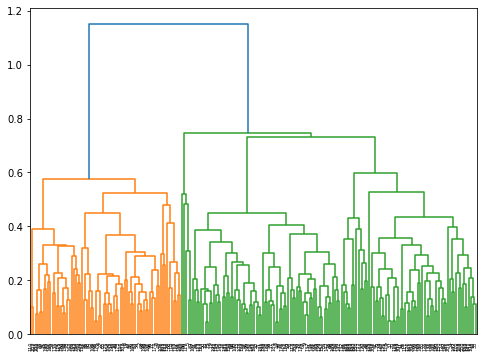

In [33]:
# importing the library
# Using average linkage method
from scipy.cluster.hierarchy import dendrogram, linkage

link = linkage(df_scaled, method = 'average')
plt.figure(figsize=(8,6))
dend = dendrogram(link)


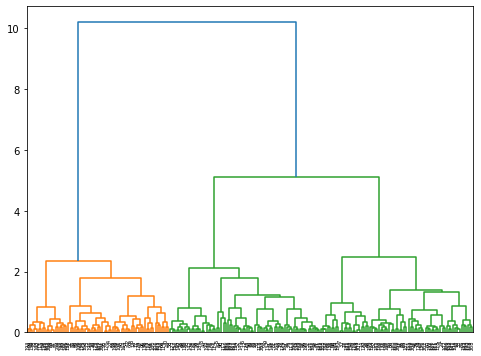

In [34]:

# Using ward linkage method
from scipy.cluster.hierarchy import dendrogram, linkage

link1 = linkage(df_scaled, method = 'ward')
plt.figure(figsize=(8,6))
dend = dendrogram(link1)

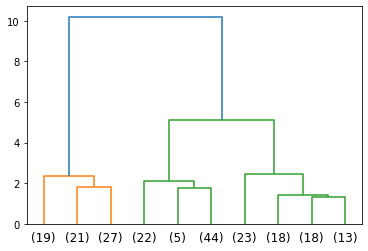

In [35]:
# Using the ward method shown 3 distinct clusters, 
# Visualizing the dendrogram with limited clusters and plotting horizontal lines on the cluster heads

dend=dendrogram (link1,truncate_mode='lastp',p=10)
plt.axhline(linestyle='--', y=12)
plt.axhline(linestyle='--', y=24)



In [36]:
# Assigning the number of clusters, it seems there are 3 optimum number of clusters in the dataset.
# Method 1 - Using maxcluster 

from scipy.cluster.hierarchy import fcluster

cluster_maxcluster = fcluster(link1, 3, criterion = 'maxclust')
cluster_maxcluster

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 3, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 2, 1, 3, 2, 3, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 2, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 2, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 2, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 3, 3], dtype=int32)

In [37]:
# Method 2 - Using distance

cluster_distance = fcluster(link1, 3 , criterion = 'distance')
cluster_distance

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 3, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 2, 1, 3, 2, 3, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 2, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 2, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 2, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 3, 3], dtype=int32)

In [38]:
# Assigning cluster ID to the dataset


df_hierarchical = df.copy()
df_hierarchical['Hierarchical_Clusters'] = cluster_distance
df_hierarchical.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Hierarchical_Clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [39]:
df3 = df_hierarchical.groupby('Hierarchical_Clusters').agg([np.mean, np.sum])
df3['Cluster_volume'] = df_hierarchical['Hierarchical_Clusters'].value_counts().sort_index()
df3

spending          advance_payments           \
                            mean      sum             mean      sum   
Hierarchical_Clusters                                                 
1                      18.452537  1236.32        16.184776  1084.38   
2                      11.988592   851.19        13.309577   944.98   
3                      14.312083  1030.47        14.279028  1028.09   

                      probability_of_full_payment            current_balance  \
                                             mean        sum            mean   
Hierarchical_Clusters                                                          
1                                        0.884042  59.230800        6.173567   
2                                        0.849177  60.291562        5.248197   
3                                        0.880457  63.392900        5.496403   

                               credit_limit          min_payment_amt  \
                           sum         mean      sum            mean   
Hierarchical_Clusters                                                  
1                      413.629      3.69206  247.368        3.696179   
2                      372.622      2.86869  203.677        4.882651   
3                      395.741      3.23975  233.262        2.529419   

                                 max_spent_in_single_shopping           \
                             sum                         mean      sum   
Hierarchical_Clusters                                                    
1                      247.64400                     6.037224  404.494   
2                      346.66825                     5.111732  362.933   
3                      182.11820                     5.114833  368.268   

                      Cluster_volume  
                                      
Hierarchical_Clusters                 
1                                 67  
2                                 71  
3                                 72

In [40]:
# Applying Agglomerative Clustering method

from sklearn.cluster import AgglomerativeClustering

Agg_Cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage = 'ward')
Agg_Cluster_groups = Agg_Cluster.fit_predict(df_scaled)
print(Agg_Cluster_groups)

[1 0 1 2 1 2 2 0 1 2 1 0 2 1 0 2 0 2 0 2 2 2 1 2 0 1 0 2 2 2 0 2 2 0 2 2 2
 2 2 1 1 0 1 1 2 2 0 1 1 1 2 1 1 1 1 1 2 2 2 1 0 2 2 0 0 1 1 0 1 0 0 2 1 1
 2 1 0 2 1 0 0 0 0 1 2 0 0 1 1 2 2 1 0 2 0 1 1 1 2 1 2 1 0 1 0 1 1 2 2 1 0
 0 1 2 2 1 0 2 2 1 0 2 2 2 0 0 1 2 0 0 2 0 0 1 2 1 1 2 1 0 2 0 2 2 0 2 1 2
 0 2 0 2 0 0 0 0 0 2 0 1 1 2 1 1 1 2 1 0 0 2 0 2 0 1 1 1 0 2 0 2 0 0 0 0 0
 1 2 0 0 2 0 0 2 1 0 1 1 2 1 2 0 1 0 2 1 0 1 0 0 0]


In [41]:
df_Agg_Clus = df.copy()
df_Agg_Clus['Agg_Clusters'] = Agg_Cluster_groups

df4 = df_Agg_Clus.groupby('Agg_Clusters').agg([np.mean,np.sum])
df4['Cluster_Volume'] = df_Agg_Clus['Agg_Clusters'].value_counts().sort_index()
df4

spending          advance_payments           \
                   mean      sum             mean      sum   
Agg_Clusters                                                 
0             14.312083  1030.47        14.279028  1028.09   
1             18.452537  1236.32        16.184776  1084.38   
2             11.988592   851.19        13.309577   944.98   

             probability_of_full_payment            current_balance           \
                                    mean        sum            mean      sum   
Agg_Clusters                                                                   
0                               0.880457  63.392900        5.496403  395.741   
1                               0.884042  59.230800        6.173567  413.629   
2                               0.849177  60.291562        5.248197  372.622   

             credit_limit          min_payment_amt             \
                     mean      sum            mean        sum   
Agg_Clusters                                                    
0                 3.23975  233.262        2.529419  182.11820   
1                 3.69206  247.368        3.696179  247.64400   
2                 2.86869  203.677        4.882651  346.66825   

             max_spent_in_single_shopping          Cluster_Volume  
                                     mean      sum                 
Agg_Clusters                                                       
0                                5.114833  368.268             72  
1                                6.037224  404.494             67  
2                                5.111732  362.933             71

In [42]:
# Both the Clustering  method shows similar Cluster profiling

In [43]:
# From the above three clusters, we see that Cluster 1 consist of those customers who spends more and pay more advance payments. They are premium customers.
# The  Cluster 2, are low monthly spending customers, however they have best minimum payment history among all the 3 clusters. Also their max spend in 
# in single shopping than Cluster 3
# The Cluster 3 are mediocre customer with average rate in all the parameters

<span style="color:blue; font-family:Calibri; text-align:center; font-size:2em;"> ****1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.**** </span>

In [44]:
# Importing K-Means library
from sklearn.cluster import KMeans 

# Checking the number of clusters from 1 to 10

wss=[]
for i in range(1,11):
    KM = KMeans(n_clusters=i, random_state=1)
    KM.fit(df_scaled)
    wss.append(KM.inertia_)
    
wss


[90.11520380592978,
 35.86521074048987,
 22.770013026036565,
 19.323702051792594,
 16.79483750741469,
 15.022004822224897,
 13.84465600595141,
 12.67709916732111,
 11.611855370425198,
 10.779872916545875]

Text(0, 0.5, 'WSS Values')

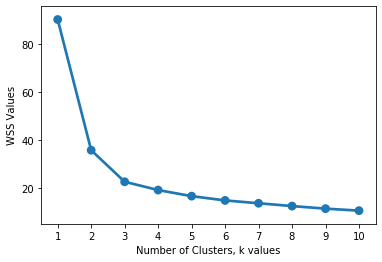

In [45]:
# Plotting the elbow curve to show the optimum number of clusters

sns.pointplot(np.arange(1,11), wss)
plt.xlabel('Number of Clusters, k values')
plt.ylabel('WSS Values')

In [46]:
# It seems the elbow curve is being created at Cluster number 2 and 3.

k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df_scaled)
labels = k_means.labels_
labels

array([1, 0, 1, 2, 1, 2, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2,
       1, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1,
       2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1,
       1, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0,
       0, 2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       0, 0, 1, 2, 2, 1, 0, 0, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0,
       2, 1, 2, 1, 1, 2, 1, 0, 0, 0, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 0, 0, 0, 2, 0, 2, 0, 1, 1, 1,
       0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 0, 2, 1, 0, 1, 1, 2,
       1, 2, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0], dtype=int32)

In [47]:
k_means.inertia_

22.770013026036565

In [48]:
# Evaluating Cluster numbers using Silhouette scores
from sklearn.metrics import silhouette_samples, silhouette_score

In [49]:
# Calculating Silhouette Score for Cluster 1 to 10

for i in range(2,11):
    k_means2 = KMeans(n_clusters = i,random_state=1)
    k_means2.fit(df_scaled)
    labels2 = k_means2.labels_
    ss=silhouette_score(df_scaled,labels2,random_state=1)
    ss = round(ss,4)
    print("The Average Silhouette Score for {} clusters is {}".format(i,ss))

The Average Silhouette Score for 2 clusters is 0.5001
The Average Silhouette Score for 3 clusters is 0.4189
The Average Silhouette Score for 4 clusters is 0.3368
The Average Silhouette Score for 5 clusters is 0.3005
The Average Silhouette Score for 6 clusters is 0.2976
The Average Silhouette Score for 7 clusters is 0.2537
The Average Silhouette Score for 8 clusters is 0.2613
The Average Silhouette Score for 9 clusters is 0.2584
The Average Silhouette Score for 10 clusters is 0.25


In [50]:
# As per the Silhouette scores, it seems Cluster numbers 2 or 3 are optimum
# Lets check the minimum silhoutte sample value for Cluster 3

df_Kmeans = df.copy()
df_Kmeans['kmeans_cluster'] = labels

sil_width = silhouette_samples(df_scaled,labels)

In [51]:
df_Kmeans['sil_width'] = sil_width
df_Kmeans['sil_width'].min()

0.0082079137543209

In [52]:
# K Means Cluster profile analysis using Cluster value = 3

df5 = df_Kmeans.groupby('kmeans_cluster').agg([np.mean, np.sum])
df5['Cluster_volume'] = df_Kmeans['kmeans_cluster'].value_counts().sort_index()
df5

spending          advance_payments           \
                     mean      sum             mean      sum   
kmeans_cluster                                                 
0               14.651159  1010.93        14.442029   996.50   
1               18.610156  1191.05        16.251719  1040.11   
2               11.896104   916.00        13.257662  1020.84   

               probability_of_full_payment            current_balance  \
                                      mean        sum            mean   
kmeans_cluster                                                          
0                                 0.882067  60.862600        5.546681   
1                                 0.884600  56.614400        6.195547   
2                                 0.849848  65.438262        5.230597   

                        credit_limit          min_payment_amt             \
                    sum         mean      sum            mean        sum   
kmeans_cluster                                                             
0               382.721     3.287304  226.824        2.796858  192.98320   
1               396.515     3.709609  237.415        3.592094  229.89400   
2               402.756     2.858026  220.068        4.591601  353.55325   

               max_spent_in_single_shopping          sil_width             \
                                       mean      sum      mean        sum   
kmeans_cluster                                                              
0                                  5.165638  356.429  0.352446  24.318792   
1                                  6.056656  387.626  0.497874  31.863926   
2                                  5.086234  391.640  0.412764  31.782864   

               Cluster_volume  
                               
kmeans_cluster                 
0                          69  
1                          64  
2                          77

<span style="color:blue; font-family:Calibri; text-align:center; font-size:2em;"> ****1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.**** </span>

In [53]:
# Adding Cluster numbers in each row using Hierarchical Clusters

df['Hierarchical_Cluster'] = cluster_distance
df.loc[:,~df.columns.isin(['kmeans_cluster','Agg_Clusters'])].head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Hierarchical_Cluster
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [54]:
# As we have seen  above , there are 3 Clusters defined as shown below. Explaining the clusters from the dendrogram method

df3 = df.groupby('Hierarchical_Cluster').agg([np.mean, np.sum])
df3['Cluster_volume'] = df['Hierarchical_Cluster'].value_counts().sort_index()
df3


spending          advance_payments           \
                           mean      sum             mean      sum   
Hierarchical_Cluster                                                 
1                     18.452537  1236.32        16.184776  1084.38   
2                     11.988592   851.19        13.309577   944.98   
3                     14.312083  1030.47        14.279028  1028.09   

                     probability_of_full_payment            current_balance  \
                                            mean        sum            mean   
Hierarchical_Cluster                                                          
1                                       0.884042  59.230800        6.173567   
2                                       0.849177  60.291562        5.248197   
3                                       0.880457  63.392900        5.496403   

                              credit_limit          min_payment_amt  \
                          sum         mean      sum            mean   
Hierarchical_Cluster                                                  
1                     413.629      3.69206  247.368        3.696179   
2                     372.622      2.86869  203.677        4.882651   
3                     395.741      3.23975  233.262        2.529419   

                                max_spent_in_single_shopping           \
                            sum                         mean      sum   
Hierarchical_Cluster                                                    
1                     247.64400                     6.037224  404.494   
2                     346.66825                     5.111732  362.933   
3                     182.11820                     5.114833  368.268   

                     Cluster_volume  
                                     
Hierarchical_Cluster                 
1                                67  
2                                71  
3                                72

In [55]:
# From the above three clusters, we see that Cluster 1 consist of those customers who spends more and pay more advance payments. They are premium customers.
# The  Cluster 2, are low monthly spending customers, however they have best minimum payment history among all the 3 clusters. Also their max spend in 
# in single shopping than Cluster 3
# The Cluster 3 are mediocre customer with average rate in all the parameters
# Detailed analysis will be mentioned in the business report

<span style="color:blue; font-family:Calibri; text-align:center; font-size:2em;"> ****Problem 2: CART-RF-ANN**** </span>


<span style="color:blue; font-family:Calibri; text-align:center; font-size:2em;"> **2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).** </span>

### Data description and initial analysis

In [56]:
# Importing the dataset

df_class=pd.read_csv('/home/jovyan/demo/insurance_part2_data.csv')

In [57]:
# Checking the dataset, datatypes, missing values, statistical descriptions
df_class.head()


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [58]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [59]:
df_class.isnull().sum().any()

False

In [60]:
# No null values, checking for duplicates

df_class.duplicated().sum()


139

In [61]:
# Dropping the duplicate rows and verifying

df_class.drop_duplicates(inplace=True)

In [62]:
df_class.duplicated().sum()

0

In [63]:
df_class.shape

(2861, 10)

In [64]:

df_class.describe(include='all')

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,2861.000000,2861,2861,2861,2861.000000,2861,2861.000000,2861.000000,2861,2861
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1238,1709,1947,NaN,2815,NaN,NaN,1071,2327
mean,38.204124,NaN,NaN,NaN,15.080996,NaN,72.120238,61.757878,NaN,NaN
std,10.678106,NaN,NaN,NaN,25.826834,NaN,135.977200,71.399740,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,31.000000,NaN,NaN,NaN,0.000000,NaN,12.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,5.630000,NaN,28.000000,33.500000,NaN,NaN
75%,43.000000,NaN,NaN,NaN,17.820000,NaN,66.000000,69.300000,NaN,NaN


In [65]:
# Checking the details for the Sales value = 0
df_class[df_class['Sales']==0.00].head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
131,53,JZI,Airlines,No,12.95,Online,93,0.0,Bronze Plan,ASIA
162,36,EPX,Travel Agency,No,0.00,Online,2,0.0,Customised Plan,ASIA
323,54,CWT,Travel Agency,No,100.98,Online,18,0.0,Customised Plan,Americas
483,44,CWT,Travel Agency,No,11.88,Online,10,0.0,Customised Plan,ASIA
513,31,CWT,Travel Agency,No,83.16,Online,99,0.0,Customised Plan,EUROPE


In [66]:
# Shape of the data rows with Sales = 0
df_class[df_class['Sales']==0.00].shape

(52, 10)

In [67]:
# Plotting the graph of product names where sales is 0

df_class[df_class['Sales']==0.00]['Product Name'].value_counts(normalize=True)

Customised Plan      0.653846
Cancellation Plan    0.192308
Bronze Plan          0.076923
Silver Plan          0.057692
Gold Plan            0.019231
Name: Product Name, dtype: float64

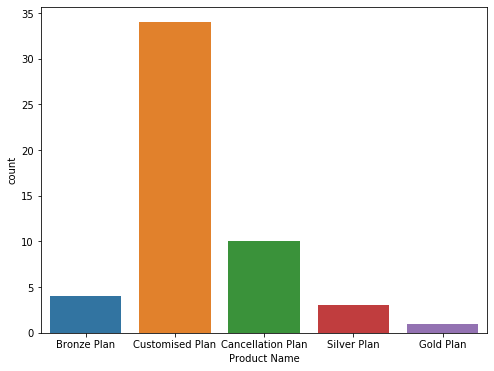

In [68]:
plt.figure(figsize=(8,6))
sns.countplot(df_class[df_class['Sales']==0.00]['Product Name'])

******Minimum age is 8 and maximum is 84******

******The Type - Travel agency has the highest frequency of 1709 rows******

******Cases of Claims are 1053******

******Maximum duration of the tour is 4580 with mean of 72******

******The Product Customized Plan is the most preferred one with frequency of 1071******

******The most preferred destination is Asia with frequency of 2327******

******Detailed insights will be mentioned in the Business Report*****


#### Data Preprocessing

In [69]:
# Treating Anomalies in Duration Column

df_class['Duration'].sort_values(ascending=True).head()

1508   -1
2628    0
1746    0
487     1
437     1
Name: Duration, dtype: int64

In [ ]:
# Dropping the bad data, -1 and 0 values cannot be a valid data for Duration column

In [70]:
df_class.drop(df_class[df_class['Duration']==-1.0].index, inplace = True)  

In [71]:
df_class.drop(df_class[df_class['Duration']==0].index, inplace = True) 

In [72]:
df_class['Duration'].describe()

count    2858.000000
mean       72.196291
std       136.028290
min         1.000000
25%        12.000000
50%        28.000000
75%        66.000000
max      4580.000000
Name: Duration, dtype: float64

In [73]:
# Unique values of the Object variables

for i in df_class.select_dtypes(include='object').columns:
    print(f'Unique values of Variable {i} are {df_class[i].unique()}')



Unique values of Variable Agency_Code are ['C2B' 'EPX' 'CWT' 'JZI']
Unique values of Variable Type are ['Airlines' 'Travel Agency']
Unique values of Variable Claimed are ['No' 'Yes']
Unique values of Variable Channel are ['Online' 'Offline']
Unique values of Variable Product Name are ['Customised Plan' 'Cancellation Plan' 'Bronze Plan' 'Silver Plan'
 'Gold Plan']
Unique values of Variable Destination are ['ASIA' 'Americas' 'EUROPE']


### Data Visualization

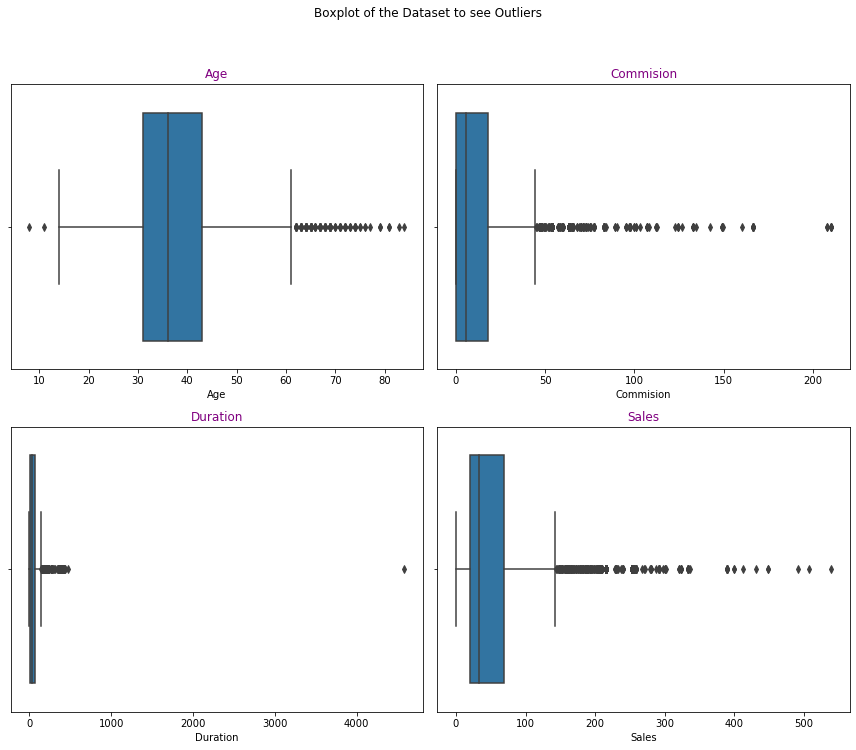

In [74]:
# Doing univariate analysis for Outlier detection
fig=plt.figure(figsize=(12,14))
fig.suptitle('Boxplot of the Dataset to see Outliers', y=1.05)
for i in range(0,df_class[df_class.select_dtypes(exclude='object').columns].shape[1]):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(df_class[df_class.select_dtypes(exclude='object').columns[i]])
    ax.set_title(df_class.select_dtypes(exclude='object').columns[i], color='purple')
    
plt.tight_layout()
plt.show()

In [75]:
# Treating Outlier in a copy dataset
df_class_nooutlier = df_class.copy()
def Outliertreatment(i):
    sorted(i)
    Q1,Q3 = i.quantile([0.25,0.75])
    IQR = Q3-Q1
    Lrange = Q1 - 1.5*IQR
    Urange = Q3 + 1.5*IQR
    return Lrange, Urange

In [76]:
for i in df_class_nooutlier.select_dtypes(exclude='object').columns:
    Lrange, Urange = Outliertreatment(df_class_nooutlier[i])
    df_class_nooutlier[i] = np.where(df_class_nooutlier[i]<Lrange, Lrange, df_class[i])
    df_class_nooutlier[i] = np.where(df_class_nooutlier[i]>Urange, Urange, df_class[i])

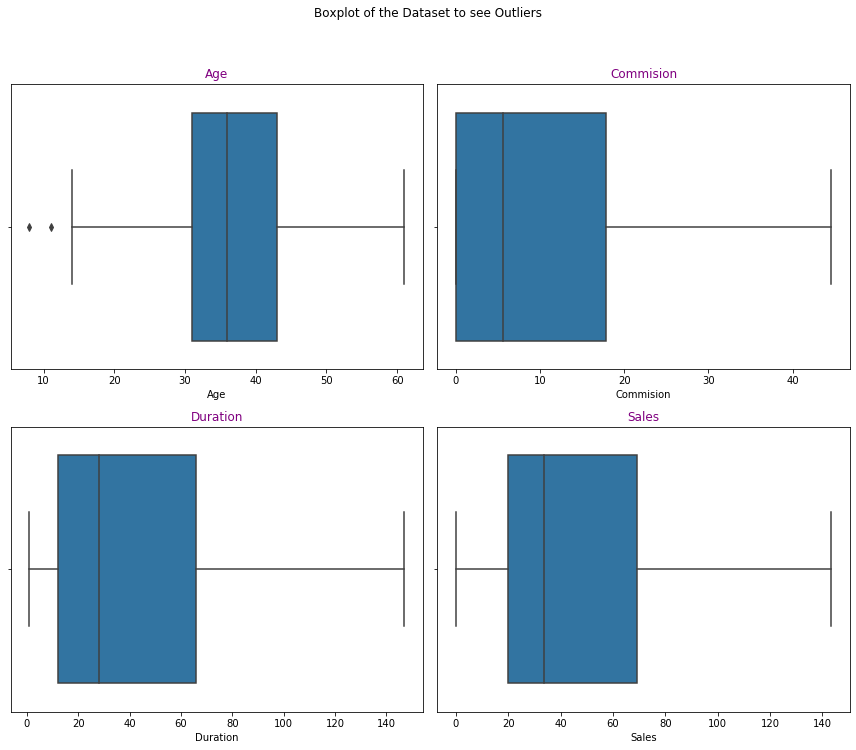

In [77]:
# Doing univariate analysis after Outlier treatment
fig=plt.figure(figsize=(12,14))
fig.suptitle('Boxplot of the Dataset to see Outliers', y=1.05)
for i in range(0,df_class_nooutlier[df_class_nooutlier.select_dtypes(exclude='object').columns].shape[1]):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(df_class_nooutlier[df_class_nooutlier.select_dtypes(exclude='object').columns[i]])
    ax.set_title(df_class_nooutlier.select_dtypes(exclude='object').columns[i], color='purple')
    
plt.tight_layout()
plt.show()

In [78]:
# Doing the Multivariate analysis

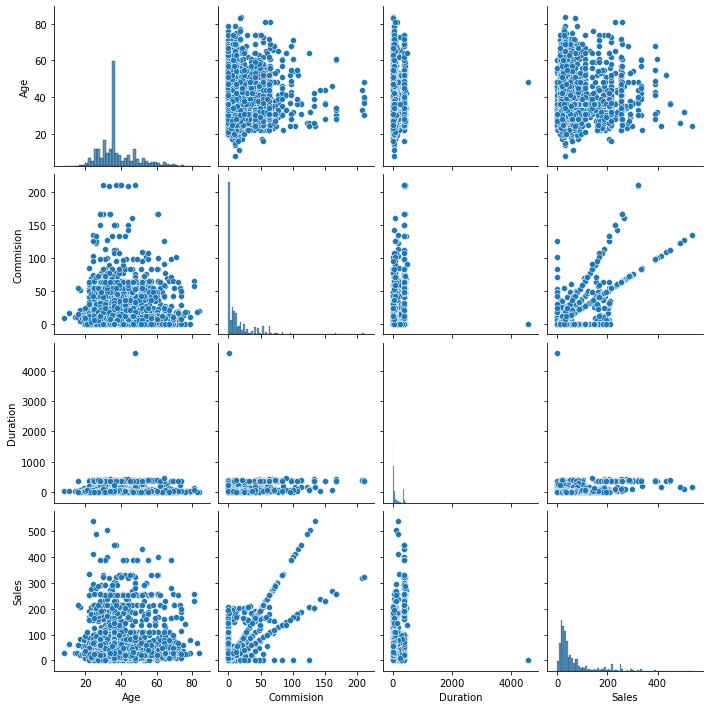

In [79]:
sns.pairplot(df_class)

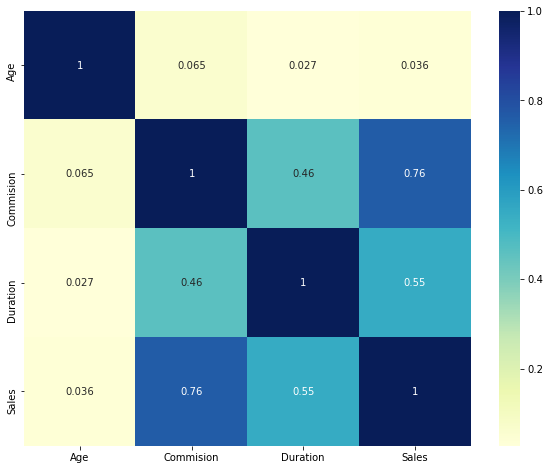

In [80]:
# There seems collinearily between Sales and Commision, checking the heat map

plt.figure(figsize=(10,8))
sns.heatmap(df_class.select_dtypes(exclude='object').corr(), annot=True, cmap = 'YlGnBu')

In [81]:
# As instructed, there is no need to drop variables in case of collinearity for classification models

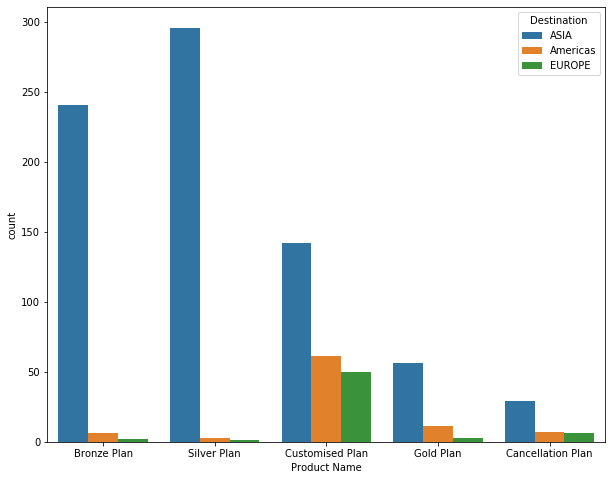

In [82]:
# Bivariate analysis for effect of Destination on Claimed data

df_claimed = df_class[df_class['Claimed']=='Yes']
plt.figure(figsize=(10,8))
sns.countplot(df_claimed['Product Name'], hue = df_claimed['Destination'])

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

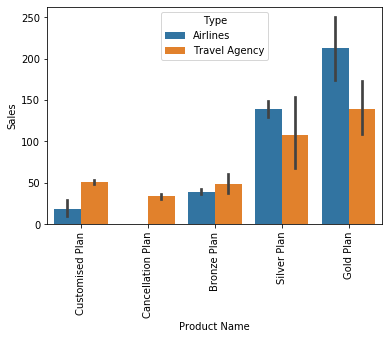

In [83]:
# Bivariate analysis between Sales and Product name as per Type

sns.barplot(x=df_class['Product Name'], y = df_class['Sales'], hue = df_class['Type'])
plt.xticks(rotation = 90)

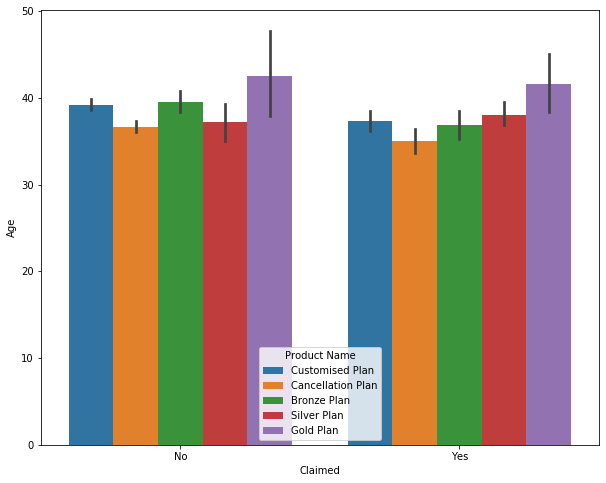

In [84]:
# Bivariate analysis for effect of Age on Claimed data for different Products

plt.figure(figsize = (10,8))
sns.barplot(y=df_class['Age'], x = df_class['Claimed'], hue = df_class['Product Name'])

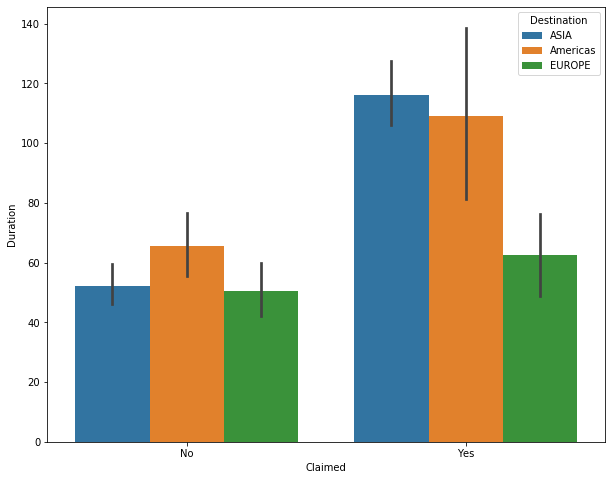

In [85]:
# Bivariate analysis for effect of Duration on Claimed data for different Destinations

plt.figure(figsize = (10,8))
sns.barplot(y=df_class['Duration'], x = df_class['Claimed'], hue = df_class['Destination'])

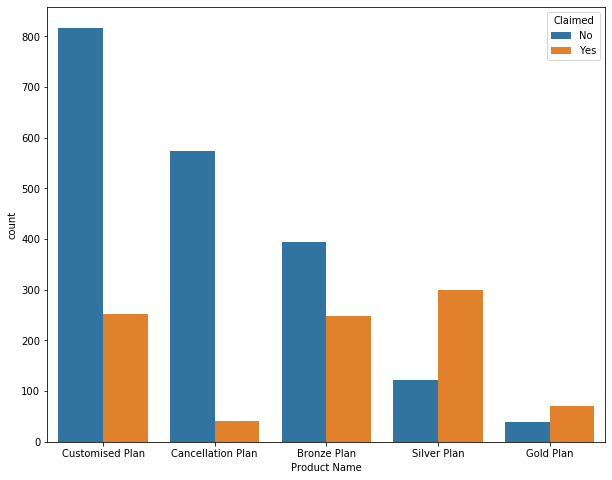

In [86]:
# Bivariate analysis of Products and Claim status

plt.figure(figsize=(10,8))
sns.countplot(df_class['Product Name'], hue = df_class['Claimed'])

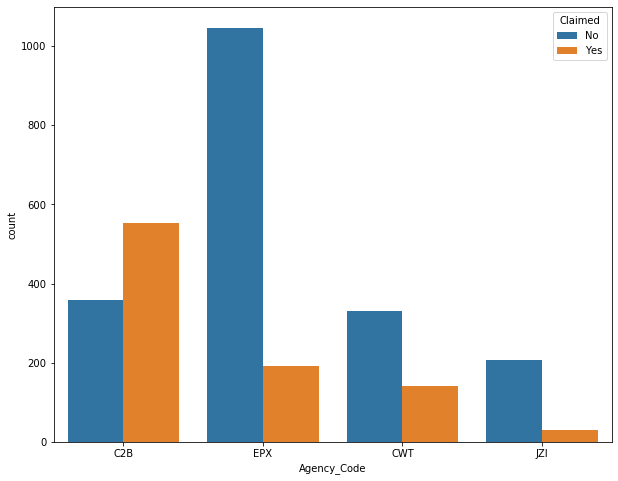

In [87]:
# Bivariate analysis of Agency Code and Claim status

plt.figure(figsize=(10,8))
sns.countplot(df_class['Agency_Code'], hue = df_class['Claimed'])

In [1]:
# No as such variation in age for the persons claimed. However it is seen that highest number of claimes are in Bronze and Silver plans
# for Destination - Asia. Also it is 0bserved that the persons claimed had opted for larger duration of trip
# Detailed analysis will be mentioned in the Business Report

<span style="color:blue; font-family:Calibri; text-align:center; font-size:2em;"> ****2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network**** </span>

### Data Preparation

In [89]:
# The object type variables needs to be converted to categorical type

df_class.select_dtypes(include='object').columns

Index(['Agency_Code', 'Type', 'Claimed', 'Channel', 'Product Name',
       'Destination'],
      dtype='object')

In [90]:
# Checking the unique values of object type variables

for i in df_class.select_dtypes(include='object').columns:
    print(f'Unique values of Variable {i} are {df_class[i].unique()}')

Unique values of Variable Agency_Code are ['C2B' 'EPX' 'CWT' 'JZI']
Unique values of Variable Type are ['Airlines' 'Travel Agency']
Unique values of Variable Claimed are ['No' 'Yes']
Unique values of Variable Channel are ['Online' 'Offline']
Unique values of Variable Product Name are ['Customised Plan' 'Cancellation Plan' 'Bronze Plan' 'Silver Plan'
 'Gold Plan']
Unique values of Variable Destination are ['ASIA' 'Americas' 'EUROPE']


In [91]:
for j in df_class.select_dtypes(['object']).columns:
    print('\n')
    print(f'Unique values of Variable {j} are {df_class[j].unique()}')
    print(f'Categorical codes of encoded variable {j} are {pd.Categorical(df_class[j].unique()).codes}')
    df_class[j]=pd.Categorical(df_class[j]).codes
    



Unique values of Variable Agency_Code are ['C2B' 'EPX' 'CWT' 'JZI']
Categorical codes of encoded variable Agency_Code are [0 2 1 3]


Unique values of Variable Type are ['Airlines' 'Travel Agency']
Categorical codes of encoded variable Type are [0 1]


Unique values of Variable Claimed are ['No' 'Yes']
Categorical codes of encoded variable Claimed are [0 1]


Unique values of Variable Channel are ['Online' 'Offline']
Categorical codes of encoded variable Channel are [1 0]


Unique values of Variable Product Name are ['Customised Plan' 'Cancellation Plan' 'Bronze Plan' 'Silver Plan'
 'Gold Plan']
Categorical codes of encoded variable Product Name are [2 1 0 4 3]


Unique values of Variable Destination are ['ASIA' 'Americas' 'EUROPE']
Categorical codes of encoded variable Destination are [0 1 2]


In [92]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2858 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2858 non-null   int64  
 1   Agency_Code   2858 non-null   int8   
 2   Type          2858 non-null   int8   
 3   Claimed       2858 non-null   int8   
 4   Commision     2858 non-null   float64
 5   Channel       2858 non-null   int8   
 6   Duration      2858 non-null   int64  
 7   Sales         2858 non-null   float64
 8   Product Name  2858 non-null   int8   
 9   Destination   2858 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 192.9 KB


In [93]:
df_class.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [94]:
df_class.shape

(2858, 10)

### Building the Classification Models without treating Outliers

In [95]:
# Splitting the dataset into train and test category, the splitting will be done as 70% train and 30% test ratio

x = df_class.drop('Claimed', axis=1)
y = df_class.pop('Claimed')


In [96]:
from sklearn.model_selection import train_test_split

x_train, x_test, target_train, target_test = train_test_split(x, y, test_size = 0.30, random_state = 1)

In [97]:
# Shape of the 4 datasets created
x_train.shape, x_test.shape, target_train.shape, target_test.shape

((2000, 9), (858, 9), (2000,), (858,))

****Building a CART Classification Model****

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
CART = DecisionTreeClassifier(criterion='gini', random_state=1)


In [100]:
CART.fit(x_train,target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [101]:
from sklearn import tree
target_label = ['No', 'Yes']
Ins_Tree_File = open('D:\Ins_Tree.dot','w')
dot_file = tree.export_graphviz(CART, out_file=Ins_Tree_File, feature_names = list(x_train), class_names = list(target_label))
Ins_Tree_File.close()

In [102]:
# The decision tree can be viewed in the http://webgraphviz.com/ by pasting the contents of the .dot file  in the website

In [103]:
# Applying Grid search for getting the best parameters before building the model

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
param_grid_CART = {'max_depth':[5, 10, 15],
             'min_samples_leaf':[10,15,20],
             'min_samples_split':[30, 45, 60]}

In [106]:
CART = DecisionTreeClassifier(random_state=1)
grid_search_CART = GridSearchCV(estimator = CART,param_grid=param_grid_CART, scoring = 'recall', cv = 5)

In [107]:
grid_search_CART.fit(x_train,target_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=1,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [10, 15, 20],
                         'min

In [108]:
grid_search_CART.best_params_

{'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 30}

In [109]:
best_grid_CART = grid_search_CART.best_estimator_

In [110]:
# Predicting the Train and Test data for the target variable

target_train_predict_CART = best_grid_CART.predict(x_train)
target_test_predict_CART = best_grid_CART.predict(x_test)

In [111]:
# best_grid_CART.score(x_test,target_test) - to test accuracy

****Building a Random Forest Classification Model****

In [112]:
# importing the Random Forest library

from sklearn.ensemble import RandomForestClassifier

In [113]:
RF = RandomForestClassifier(random_state=1)
RF

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [114]:
# Applying the grid search function for getting the best parameters
from sklearn.model_selection import GridSearchCV
param_grid_RF = {
    'max_depth': [8, 10],
    'max_features': [3, 4],
    'min_samples_leaf': [15, 20, 30],
    'min_samples_split': [45, 60 ,90],
    'n_estimators': [40, 60, 80]}

In [115]:
grid_search_RF = GridSearchCV(estimator = RF, param_grid =param_grid_RF, scoring = 'recall', cv=5 )

In [116]:
grid_search_RF.fit(x_train,target_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'m

In [117]:
grid_search_RF.best_params_

{'max_depth': 8,
 'max_features': 4,
 'min_samples_leaf': 20,
 'min_samples_split': 60,
 'n_estimators': 80}

In [118]:
best_grid_RF = grid_search_RF.best_estimator_

In [119]:
# Predicting the Train and Test data for the target variable

target_train_predict_RF = best_grid_RF.predict(x_train)
target_test_predict_RF = best_grid_RF.predict(x_test)

****Building a Artificial Neural Network Classification Model****

In [120]:
# Importing the library for scaling the train dataset. Scaling is done before the Classification model
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
x_train_scaled = sc.fit_transform(x_train) 
x_test_scaled = sc.transform (x_test)

In [121]:
# importing the library for ANN

from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier(random_state=1)

In [122]:
# Applying the grid search for getting the best parameters
from sklearn.model_selection import GridSearchCV
param_grid_MLP = {
    'hidden_layer_sizes': [100],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.01, 0.0001]
    
}

MLP = MLPClassifier(random_state=1)

grid_search_MLP = GridSearchCV(estimator = MLP, param_grid = param_grid_MLP,scoring= 'recall', cv = 5)


In [123]:
grid_search_MLP.fit(x_train_scaled,target_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=1, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'activation': ['logistic', 'relu'],
        

In [124]:
grid_search_MLP.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 100,
 'solver': 'adam',
 'tol': 0.0001}

In [125]:
best_grid_MLP = grid_search_MLP.best_estimator_

In [126]:
# Predicting the Train and Test data for the target variable

target_train_predict_MLP = best_grid_MLP.predict(x_train_scaled)
target_test_predict_MLP = best_grid_MLP.predict(x_test_scaled)

****Classification Models created using CART, RF and ANN using the dataset with Outliers****

### Building the Classification Models after treating Outliers, that is the dataset used now do not have any Outliers

In [127]:
# Converting the object variables to categorical ones for the data set with no outliers
for j in df_class_nooutlier.select_dtypes(['object']).columns:
    print('\n')
    print(f'Unique values of Variable {j} are {df_class_nooutlier[j].unique()}')
    print(f'Categorical codes of encoded variable {j} are {pd.Categorical(df_class_nooutlier[j].unique()).codes}')
    df_class_nooutlier[j]=pd.Categorical(df_class_nooutlier[j]).codes



Unique values of Variable Agency_Code are ['C2B' 'EPX' 'CWT' 'JZI']
Categorical codes of encoded variable Agency_Code are [0 2 1 3]


Unique values of Variable Type are ['Airlines' 'Travel Agency']
Categorical codes of encoded variable Type are [0 1]


Unique values of Variable Claimed are ['No' 'Yes']
Categorical codes of encoded variable Claimed are [0 1]


Unique values of Variable Channel are ['Online' 'Offline']
Categorical codes of encoded variable Channel are [1 0]


Unique values of Variable Product Name are ['Customised Plan' 'Cancellation Plan' 'Bronze Plan' 'Silver Plan'
 'Gold Plan']
Categorical codes of encoded variable Product Name are [2 1 0 4 3]


Unique values of Variable Destination are ['ASIA' 'Americas' 'EUROPE']
Categorical codes of encoded variable Destination are [0 1 2]


In [128]:
df_class_nooutlier.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0,0.00,1,34.0,20.00,2,0
2,39.0,1,1,0,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0,0.00,1,4.0,26.00,1,0
4,33.0,3,0,0,6.30,1,53.0,18.00,0,0


In [129]:
# Splitting the dataset into train and test category, the splitting will be done as 70% train and 30% test ratio

x1 = df_class_nooutlier.drop('Claimed', axis=1)
y1 = df_class_nooutlier.pop('Claimed')

In [130]:
x_train1, x_test1, target_train1, target_test1 = train_test_split(x1, y1, test_size = 0.30, random_state = 1)

In [131]:
# Shape of the 4 datasets created
x_train1.shape, x_test1.shape, target_train1.shape, target_test1.shape

((2000, 9), (858, 9), (2000,), (858,))

***Building the CART model with the same Grid parameters***

In [132]:
grid_search_CART.fit(x_train1,target_train1)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=1,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [10, 15, 20],
                         'min

In [133]:
grid_search_CART.best_params_

{'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 30}

In [134]:
best_grid_CART1 = grid_search_CART.best_estimator_

In [135]:
# Predicting the Train and Test data for the target variable

target_train_predict_CART1 = best_grid_CART1.predict(x_train1)
target_test_predict_CART1 = best_grid_CART1.predict(x_test1)

***Building the RF model with the same Grid parameters***

In [136]:
grid_search_RF.fit(x_train1,target_train1)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'m

In [137]:
grid_search_RF.best_params_

{'max_depth': 8,
 'max_features': 4,
 'min_samples_leaf': 15,
 'min_samples_split': 60,
 'n_estimators': 80}

In [138]:
best_grid_RF1 = grid_search_RF.best_estimator_

In [139]:
# Predicting the Train and Test data for the target variable

target_train_predict_RF1 = best_grid_RF1.predict(x_train1)
target_test_predict_RF1 = best_grid_RF1.predict(x_test1)

***Building the ANN model with the same Grid parameters***

In [140]:
# Importing the library for scaling the train dataset. Scaling is done before the Classification model
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
x_train_scaled1 = sc.fit_transform(x_train1) 
x_test_scaled1 = sc.transform (x_test1)

In [141]:
grid_search_MLP.fit(x_train_scaled1,target_train1)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=1, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'activation': ['logistic', 'relu'],
        

In [142]:
grid_search_MLP.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 100,
 'solver': 'adam',
 'tol': 0.0001}

In [143]:
best_grid_MLP1 = grid_search_MLP.best_estimator_

In [144]:
# Predicting the Train and Test data for the target variable

target_train_predict_MLP1 = best_grid_MLP1.predict(x_train_scaled1)
target_test_predict_MLP1 = best_grid_MLP1.predict(x_test_scaled1)

<span style="color:blue; font-family:Calibri; text-align:center; font-size:2em;"> ****2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model**** </span>

### Accuracy Score of the 3 models using dataset with Outliers

In [145]:
# Accuracy Score of the 3 models using dataset with Outliers

CART_TRAIN = best_grid_CART.score(x_train,target_train)
CART_TEST = best_grid_CART.score(x_test,target_test)

RF_TRAIN = best_grid_RF.score(x_train,target_train)
RF_TEST = best_grid_RF.score(x_test,target_test)

ANN_TRAIN = best_grid_MLP.score(x_train_scaled,target_train)
ANN_TEST = best_grid_MLP.score(x_test_scaled,target_test)

In [146]:
Accuracy_Scores = pd.DataFrame(data = [[CART_TRAIN,CART_TEST],[RF_TRAIN,RF_TEST],[ANN_TRAIN,ANN_TEST]], columns = ['Train_Score','Test_Score'], index = ['CART','RF','ANN']) 

In [147]:
Accuracy_Scores

,Train_Score,Test_Score
CART,0.7805,0.785548
RF,0.7810,0.794872
ANN,0.7755,0.779720


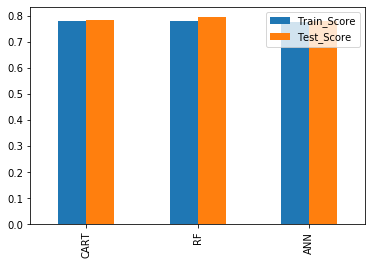

In [148]:
Accuracy_Scores.plot(kind = 'bar')

### Accuracy Score of the 3 models using dataset without Outliers

In [149]:
# Accuracy Score of the 3 models using dataset without Outliers

CART_TRAIN1 = best_grid_CART1.score(x_train1,target_train1)
CART_TEST1 = best_grid_CART1.score(x_test1,target_test1)

RF_TRAIN1 = best_grid_RF1.score(x_train1,target_train1)
RF_TEST1 = best_grid_RF1.score(x_test1,target_test1)

ANN_TRAIN1 = best_grid_MLP1.score(x_train_scaled1,target_train1)
ANN_TEST1 = best_grid_MLP1.score(x_test_scaled1,target_test1)

In [150]:
Accuracy_Scores1 = pd.DataFrame(data = [[CART_TRAIN1,CART_TEST1],[RF_TRAIN1,RF_TEST1],[ANN_TRAIN1,ANN_TEST1]], columns = ['Train_Score','Test_Score'], index = ['CART','RF','ANN']) 

In [151]:
Accuracy_Scores1

,Train_Score,Test_Score
CART,0.7955,0.761072
RF,0.7865,0.799534
ANN,0.7800,0.791375


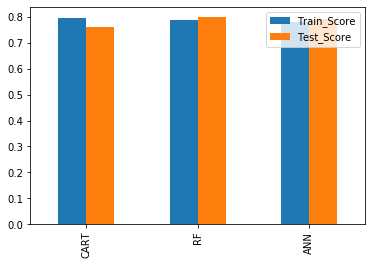

In [152]:
Accuracy_Scores1.plot(kind = 'bar')

## Plotting the Confusion matrix, ROC Curve, Classification Report on the dataset with Outlier

In [153]:
# Plotting the Confustion matrix on the dataset with Outlier

from sklearn.metrics import classification_report,confusion_matrix

### Plotting the Confusion matrix on the Train dataset with Outlier

In [154]:
# Confustion Matrix of Train data with Outliers for CART, RF and ANN

In [155]:
# Confustion Matrix for CART - Train Data with Outliers
confusion_matrix( target_train, target_train_predict_CART)

array([[1181,  164],
       [ 275,  380]])

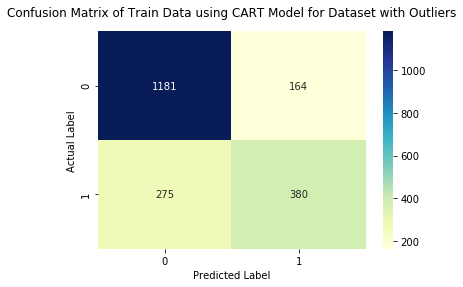

In [156]:
confusion_matrix(target_train, target_train_predict_CART)
sns.heatmap(confusion_matrix(target_train, target_train_predict_CART),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data using CART Model for Dataset with Outliers', pad =15)
plt.show()

In [157]:
# Confustion Matrix for RF - - Train Data with Outliers

In [158]:
confusion_matrix( target_train, target_train_predict_RF)

array([[1177,  168],
       [ 270,  385]])

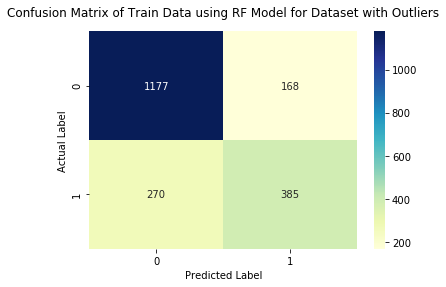

In [159]:
confusion_matrix(target_train, target_train_predict_RF)
sns.heatmap(confusion_matrix(target_train, target_train_predict_RF),annot=True,fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data using RF Model for Dataset with Outliers', pad =15)
plt.show()

In [160]:
# Confustion Matrix for ANN - Train Data with Outliers

In [161]:
confusion_matrix( target_train, target_train_predict_MLP)

array([[1168,  177],
       [ 272,  383]])

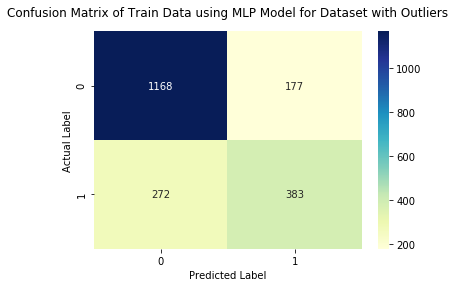

In [162]:
confusion_matrix(target_train, target_train_predict_MLP)
sns.heatmap(confusion_matrix(target_train, target_train_predict_MLP),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data using MLP Model for Dataset with Outliers', pad =15)
plt.show()

### Plotting the Confusion matrix on the Test dataset with Outlier

In [163]:
# Confustion Matrix of Test data with Outliers for CART, RF and ANN

In [164]:
# Confustion Matrix for CART - Test Data with Outliers
confusion_matrix( target_test, target_test_predict_CART)

array([[527,  72],
       [112, 147]])

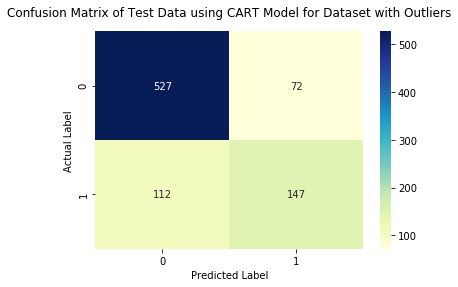

In [165]:
confusion_matrix(target_test, target_test_predict_CART)
sns.heatmap(confusion_matrix(target_test, target_test_predict_CART),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data using CART Model for Dataset with Outliers', pad =15)
plt.show()

In [166]:
# Confustion Matrix for RF - Test Data with Outliers
confusion_matrix( target_test, target_test_predict_RF)

array([[535,  64],
       [112, 147]])

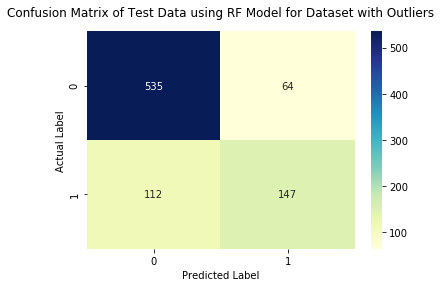

In [167]:
confusion_matrix(target_test, target_test_predict_RF)
sns.heatmap(confusion_matrix(target_test, target_test_predict_RF),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data using RF Model for Dataset with Outliers', pad =15)
plt.show()

In [168]:
# Confustion Matrix for ANN - Test Data with Outliers
confusion_matrix( target_test, target_test_predict_MLP)

array([[528,  71],
       [118, 141]])

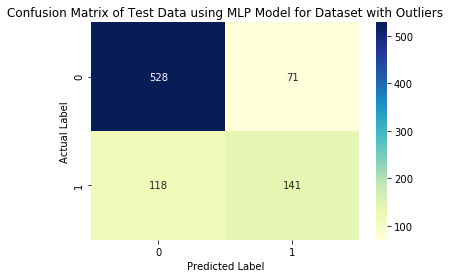

In [169]:
confusion_matrix(target_test, target_test_predict_MLP)
sns.heatmap(confusion_matrix(target_test, target_test_predict_MLP),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data using MLP Model for Dataset with Outliers')
plt.show()

### Plotting the Classification Report on the Train dataset with Outlier

In [170]:
# Classification Matrix of Train data with Outliers for CART, RF and ANN

In [171]:
# Classification Matrix of Train data - CART

In [172]:
print(classification_report(target_train, target_train_predict_CART))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1345
           1       0.70      0.58      0.63       655

    accuracy                           0.78      2000
   macro avg       0.75      0.73      0.74      2000
weighted avg       0.77      0.78      0.77      2000



In [173]:
# Classification Matrix of Train data - RF

In [174]:
print(classification_report(target_train, target_train_predict_RF))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1345
           1       0.70      0.59      0.64       655

    accuracy                           0.78      2000
   macro avg       0.75      0.73      0.74      2000
weighted avg       0.78      0.78      0.78      2000



In [175]:
# Classification Matrix of Train data - ANN

In [176]:
print(classification_report(target_train, target_train_predict_MLP))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1345
           1       0.68      0.58      0.63       655

    accuracy                           0.78      2000
   macro avg       0.75      0.73      0.73      2000
weighted avg       0.77      0.78      0.77      2000



### Plotting the Classification Report on the Test dataset with Outlier

In [177]:
# Classification Report of Test data with Outliers for CART, RF and ANN

In [178]:
# Classification Report of Test data - CART

In [179]:
print(classification_report(target_test, target_test_predict_CART))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       599
           1       0.67      0.57      0.62       259

    accuracy                           0.79       858
   macro avg       0.75      0.72      0.73       858
weighted avg       0.78      0.79      0.78       858



In [180]:
# Classification Report of Test data - RF

In [181]:
print(classification_report(target_test, target_test_predict_RF))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       599
           1       0.70      0.57      0.63       259

    accuracy                           0.79       858
   macro avg       0.76      0.73      0.74       858
weighted avg       0.79      0.79      0.79       858



In [182]:
# Classification Report of Test data - ANN

In [183]:
print(classification_report(target_test, target_test_predict_MLP))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       599
           1       0.67      0.54      0.60       259

    accuracy                           0.78       858
   macro avg       0.74      0.71      0.72       858
weighted avg       0.77      0.78      0.77       858



### Measuring the AUC-ROC curve on the Train dataset with Outlier for the 3 models

In [184]:
# AUC-ROC curve of Train data - CART

AUC: 0.828


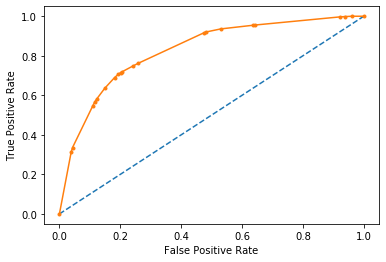

In [185]:
# predict probabilities
probs = best_grid_CART.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_train_CART = roc_auc_score(target_train, probs)
print('AUC: %.3f' % auc_train_CART)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(target_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [186]:
auc_train_CART 

0.8277635574221743

In [187]:
# AUC-ROC curve of Train data - RF

AUC: 0.840


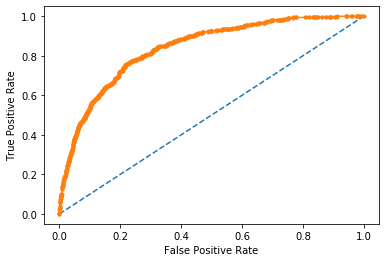

In [188]:
# predict probabilities
probs = best_grid_RF.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_train_RF = roc_auc_score(target_train, probs)
print('AUC: %.3f' % auc_train_RF)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(target_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [189]:
# AUC-ROC curve of Train data - ANN

AUC: 0.828


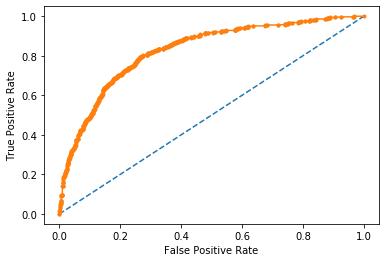

In [190]:
# predict probabilities
probs = best_grid_MLP.predict_proba(x_train_scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_train_ANN = roc_auc_score(target_train, probs)
print('AUC: %.3f' % auc_train_ANN)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(target_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

### Measuring the AUC-ROC curve on the Test dataset with Outlier for the 3 models

In [191]:
# AUC-ROC curve of Test data - CART

AUC: 0.800


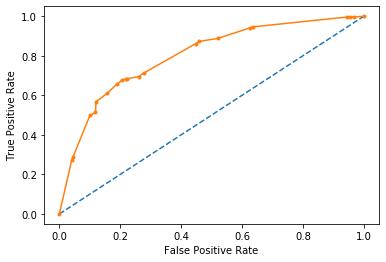

In [192]:
# predict probabilities
probs = best_grid_CART.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_test_CART = roc_auc_score(target_test, probs)
print('AUC: %.3f' % auc_test_CART)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(target_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [193]:
# AUC-ROC curve of Test data - RF

AUC: 0.826


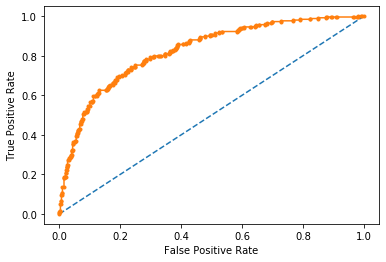

In [194]:
# predict probabilities
probs = best_grid_RF.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_test_RF = roc_auc_score(target_test, probs)
print('AUC: %.3f' % auc_test_RF)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(target_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [195]:
# AUC-ROC curve of Test data - ANN

AUC: 0.828


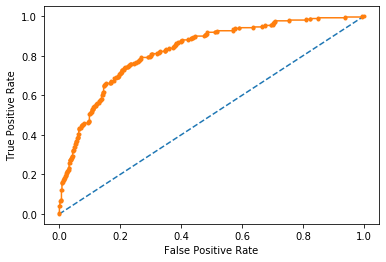

In [196]:
# predict probabilities
probs = best_grid_MLP.predict_proba(x_test_scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_test_ANN = roc_auc_score(target_test, probs)
print('AUC: %.3f' % auc_test_ANN )
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(target_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

### Variable Importance in case of Train dataset with Outlier for 2 models - CART, RF


In [197]:
print (pd.DataFrame(best_grid_CART.feature_importances_, columns = ["Var_Imp_CART"], index = x_train.columns).sort_values('Var_Imp_CART',ascending=False))

              Var_Imp_CART
Agency_Code       0.546679
Sales             0.228174
Product Name      0.076205
Duration          0.058984
Commision         0.045650
Age               0.032252
Destination       0.012056
Type              0.000000
Channel           0.000000


In [198]:
print (pd.DataFrame(best_grid_RF.feature_importances_, columns = ["Var_Imp_RF"], index = x_train.columns).sort_values('Var_Imp_RF',ascending=False))

              Var_Imp_RF
Agency_Code     0.317782
Sales           0.184893
Product Name    0.179837
Commision       0.100111
Duration        0.081110
Type            0.067862
Age             0.052379
Destination     0.014117
Channel         0.001910


## Plotting the Confusion matrix, ROC Curve, Classification Report on the dataset without Outlier

### Plotting the Confusion matrix on Train dataset without Outlier for CART,RF and ANN models

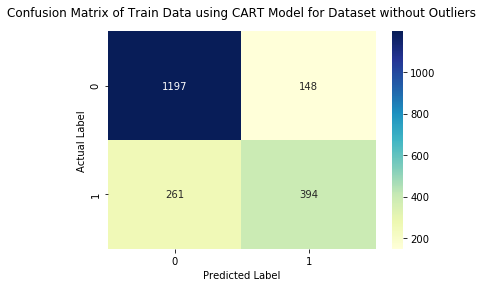

In [199]:
confusion_matrix(target_train1, target_train_predict_CART1)
sns.heatmap(confusion_matrix(target_train1, target_train_predict_CART1),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data using CART Model for Dataset without Outliers', pad =15)
plt.show()

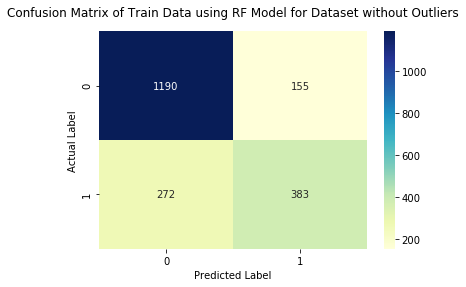

In [200]:
confusion_matrix(target_train1, target_train_predict_RF1)
sns.heatmap(confusion_matrix(target_train1, target_train_predict_RF1),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data using RF Model for Dataset without Outliers', pad =15)
plt.show()

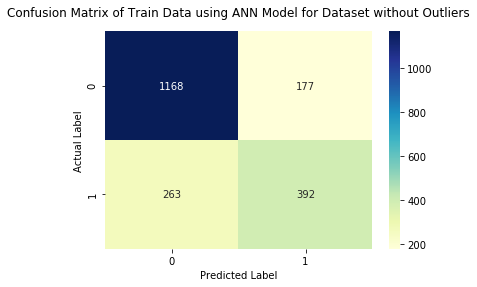

In [201]:
confusion_matrix(target_train1, target_train_predict_MLP1)
sns.heatmap(confusion_matrix(target_train1, target_train_predict_MLP1),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data using ANN Model for Dataset without Outliers', pad =15)
plt.show()

### Plotting the Classification Report on the Train dataset without Outlier for the 3 models

In [202]:
print(classification_report(target_train1, target_train_predict_CART1))
print('Classification Report for CART model in Train Dataset without outlier')

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1345
           1       0.73      0.60      0.66       655

    accuracy                           0.80      2000
   macro avg       0.77      0.75      0.76      2000
weighted avg       0.79      0.80      0.79      2000

Classification Report for CART model in Train Dataset without outlier


In [203]:
print(classification_report(target_train1, target_train_predict_RF1))
print('Classification Report for RF model in Train Dataset without outlier')

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      1345
           1       0.71      0.58      0.64       655

    accuracy                           0.79      2000
   macro avg       0.76      0.73      0.74      2000
weighted avg       0.78      0.79      0.78      2000

Classification Report for RF model in Train Dataset without outlier


In [204]:
print(classification_report(target_train1, target_train_predict_MLP1))
print('Classification Report for ANN model in Train Dataset without outlier')

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1345
           1       0.69      0.60      0.64       655

    accuracy                           0.78      2000
   macro avg       0.75      0.73      0.74      2000
weighted avg       0.77      0.78      0.78      2000

Classification Report for ANN model in Train Dataset without outlier


### Measuring  the AUC-ROC curve on the Train dataset without Outlier for the 3 models

In [205]:
# AUC-ROC curve of Train data without Outlier - CART

AUC: 0.868


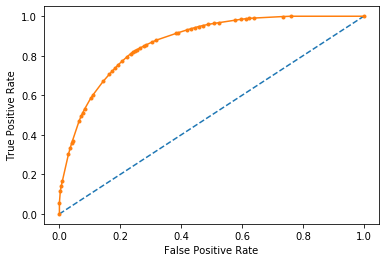

In [206]:
# predict probabilities
probs = best_grid_CART1.predict_proba(x_train1)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_train_CART1 = roc_auc_score(target_train1, probs)
print('AUC: %.3f' % auc_train_CART1 )
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(target_train1, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [207]:
# AUC-ROC curve of Train data without Outlier - RF

AUC: 0.843


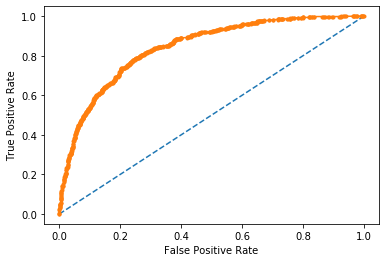

In [208]:
# predict probabilities
probs = best_grid_RF1.predict_proba(x_train1)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_train_RF1  = roc_auc_score(target_train1, probs)
print('AUC: %.3f' % auc_train_RF1)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(target_train1, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [209]:
# AUC-ROC curve of Train data without Outlier - ANN

AUC: 0.835


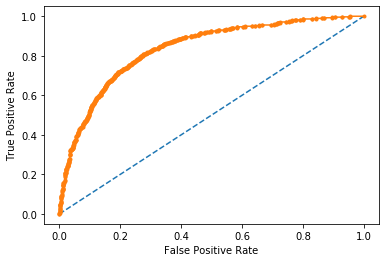

In [210]:
# predict probabilities
probs = best_grid_MLP1.predict_proba(x_train_scaled1)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_train_ANN1 = roc_auc_score(target_train1, probs)
print('AUC: %.3f' % auc_train_ANN1 )
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(target_train1, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

### Plotting the Confusion matrix on Test dataset without Outlier for CART,RF and ANN models

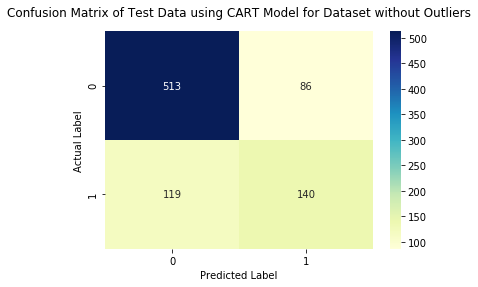

In [211]:
confusion_matrix(target_test1, target_test_predict_CART1)
sns.heatmap(confusion_matrix(target_test1, target_test_predict_CART1),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data using CART Model for Dataset without Outliers', pad =15)
plt.show()

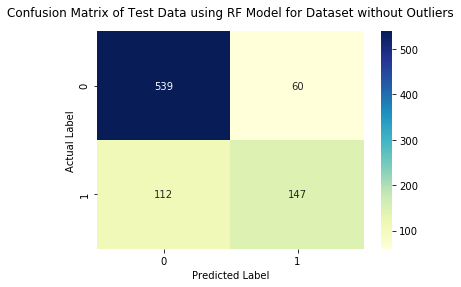

In [212]:
confusion_matrix(target_test1, target_test_predict_RF1)
sns.heatmap(confusion_matrix(target_test1, target_test_predict_RF1),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data using RF Model for Dataset without Outliers', pad =15)
plt.show()

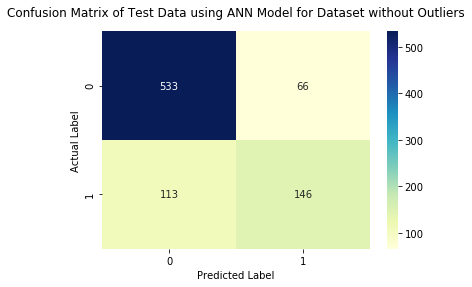

In [213]:
confusion_matrix(target_test1, target_test_predict_MLP1)
sns.heatmap(confusion_matrix(target_test1, target_test_predict_MLP1),annot=True, fmt='d',cbar=True, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data using ANN Model for Dataset without Outliers', pad =15)
plt.show()

### Plotting the Classification report on Test dataset without Outlier for CART,RF and ANN models

In [214]:
print(classification_report(target_test1, target_test_predict_CART1))
print('Classification Report for CART model in Test Dataset without outlier')

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       599
           1       0.62      0.54      0.58       259

    accuracy                           0.76       858
   macro avg       0.72      0.70      0.71       858
weighted avg       0.75      0.76      0.76       858

Classification Report for CART model in Test Dataset without outlier


In [215]:
print(classification_report(target_test1, target_test_predict_RF1))
print('Classification Report for RF model in Test Dataset without outlier')

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       599
           1       0.71      0.57      0.63       259

    accuracy                           0.80       858
   macro avg       0.77      0.73      0.75       858
weighted avg       0.79      0.80      0.79       858

Classification Report for RF model in Test Dataset without outlier


In [216]:
print(classification_report(target_test1, target_test_predict_MLP1))
print('Classification Report for ANN model in Test Dataset without outlier')

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       599
           1       0.69      0.56      0.62       259

    accuracy                           0.79       858
   macro avg       0.76      0.73      0.74       858
weighted avg       0.78      0.79      0.78       858

Classification Report for ANN model in Test Dataset without outlier


### Measuring  the AUC-ROC curve on the Test dataset without Outlier for the 3 models

In [217]:
# AUC-ROC curve of Test data without Outlier - CART

AUC: 0.773


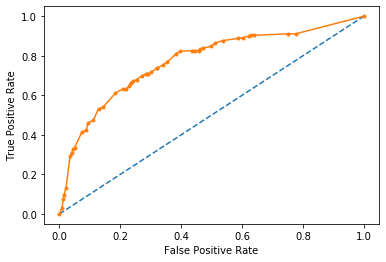

In [218]:
# predict probabilities
probs = best_grid_CART1.predict_proba(x_test1)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_test_CART1 = roc_auc_score(target_test1, probs)
print('AUC: %.3f' % auc_test_CART1)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(target_test1, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [219]:
# AUC-ROC curve of Test data without Outlier - RF

AUC: 0.827


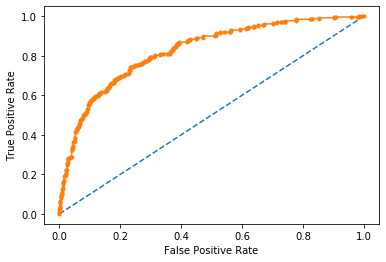

In [220]:
# predict probabilities
probs = best_grid_RF1.predict_proba(x_test1)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_test_RF1 = roc_auc_score(target_test1, probs)
print('AUC: %.3f' % auc_test_RF1)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(target_test1, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [221]:
# AUC-ROC curve of Test data without Outlier - ANN

AUC: 0.825


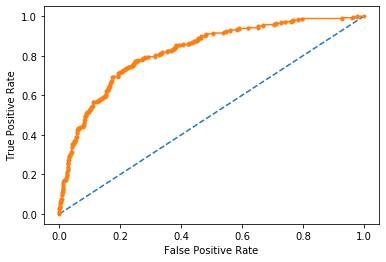

In [222]:
# predict probabilities
probs = best_grid_MLP1.predict_proba(x_test_scaled1)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc_test_ANN1 = roc_auc_score(target_test1, probs)
print('AUC: %.3f' % auc_test_ANN1)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(target_test1, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

### Variable Importance in case of Train dataset without Outlier for 2 models - CART, RF

In [223]:
print (pd.DataFrame(best_grid_CART1.feature_importances_, columns = ["Var_Imp_CART"], index = x_train1.columns).sort_values('Var_Imp_CART',ascending=False))

              Var_Imp_CART
Agency_Code       0.446335
Sales             0.236704
Duration          0.125757
Product Name      0.062217
Age               0.058335
Commision         0.052258
Destination       0.018393
Type              0.000000
Channel           0.000000


In [224]:
print (pd.DataFrame(best_grid_RF1.feature_importances_, columns = ["Var_Imp_RF"], index = x_train1.columns).sort_values('Var_Imp_RF',ascending=False))

              Var_Imp_RF
Agency_Code     0.316794
Sales           0.186711
Product Name    0.177619
Commision       0.096401
Duration        0.080237
Type            0.065789
Age             0.058197
Destination     0.014064
Channel         0.004187


<span style="color:blue; font-family:Calibri; text-align:center; font-size:2em;">****2.4 Final Model: Compare all the models and write an inference which model is best/optimized**** </span>


### Extracting the Accuracy, precision, Recall, F1 Score for Test and Train Data for Dataset with Outlier

In [225]:
## Extracting for the Train Data
from sklearn.metrics import precision_recall_fscore_support as score

In [226]:
precision_Train_CART,recall_Train_CART,fscore_Train_CART,support_Train_CART =score(target_train, target_train_predict_CART,average='macro')

In [227]:
precision_Train_RF,recall_Train_RF,fscore_Train_RF,support_Train_RF =score(target_train, target_train_predict_RF,average='macro')

In [228]:
precision_Train_ANN,recall_Train_ANN,fscore_Train_ANN,support_Train_ANN =score(target_train, target_train_predict_MLP,average='macro')

In [229]:
## Extracting for the Test Data

In [230]:
precision_Test_CART,recall_Test_CART,fscore_Test_CART,support_Test_CART =score(target_test, target_test_predict_CART,average='macro')

In [231]:
precision_Test_RF,recall_Test_RF,fscore_Test_RF,support_Test_RF =score(target_test, target_test_predict_RF,average='macro')

In [232]:
precision_Test_ANN,recall_Test_ANN,fscore_Test_ANN,support_Test_ANN =score(target_test, target_test_predict_MLP,average='macro')

In [233]:
# Creating DataFrame of Classification Report using 3 models for the Train datset with Outliers
index = ['CART', 'RF', 'ANN']
column = ['Precision_Train','Recall_Train','fscore_Train','Accuracy_Train', 'AUC-ROC Score']
Class_Report_with_outlier_Train = pd.DataFrame(data = [[precision_Train_CART,recall_Train_CART,fscore_Train_CART,CART_TRAIN, auc_train_CART],
                                                      [precision_Train_RF,recall_Train_RF,fscore_Train_RF,RF_TRAIN,auc_train_RF],
                                                      [precision_Train_ANN,recall_Train_ANN,fscore_Train_ANN,ANN_TRAIN, auc_train_ANN]], columns = column, index= index)

In [234]:
round(Class_Report_with_outlier_Train,2)

,Precision_Train,Recall_Train,fscore_Train,Accuracy_Train,AUC-ROC Score
CART,0.75,0.73,0.74,0.78,0.83
RF,0.75,0.73,0.74,0.78,0.84
ANN,0.75,0.73,0.73,0.78,0.83


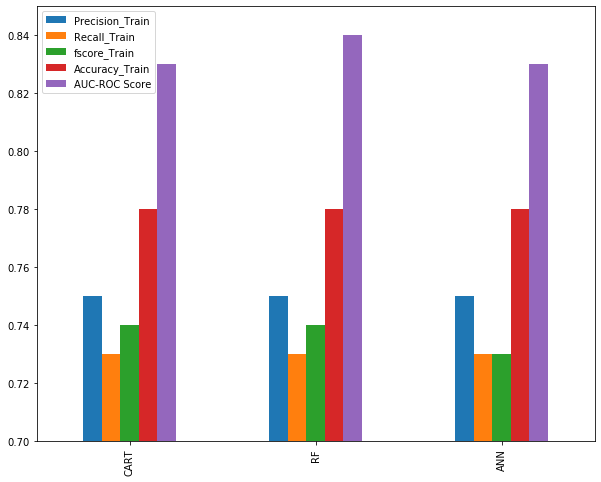

In [235]:
round(Class_Report_with_outlier_Train,2).plot(kind='bar',figsize=(10,8))
plt.ylim([0.7,0.85])
plt.legend( loc='best')

In [236]:
# Creating DataFrame of Classification Report using 3 models for the Test datset with Outliers
index1 = ['CART', 'RF', 'ANN']
column1 = ['Precision_Test','Recall_Test','fscore_Test','Accuracy_Test','AUC-ROC Score']
Class_Report_with_outlier_Test = pd.DataFrame(data = [[precision_Test_CART,recall_Test_CART,fscore_Test_CART,CART_TEST,auc_test_CART],
                                                      [precision_Test_RF,recall_Test_RF,fscore_Test_RF,RF_TEST,auc_test_RF],
                                                      [precision_Test_ANN,recall_Test_ANN,fscore_Test_ANN,ANN_TEST,auc_test_ANN]], columns = column1, index= index1)

In [237]:
round(Class_Report_with_outlier_Test,2)

,Precision_Test,Recall_Test,fscore_Test,Accuracy_Test,AUC-ROC Score
CART,0.75,0.72,0.73,0.79,0.80
RF,0.76,0.73,0.74,0.79,0.83
ANN,0.74,0.71,0.72,0.78,0.83


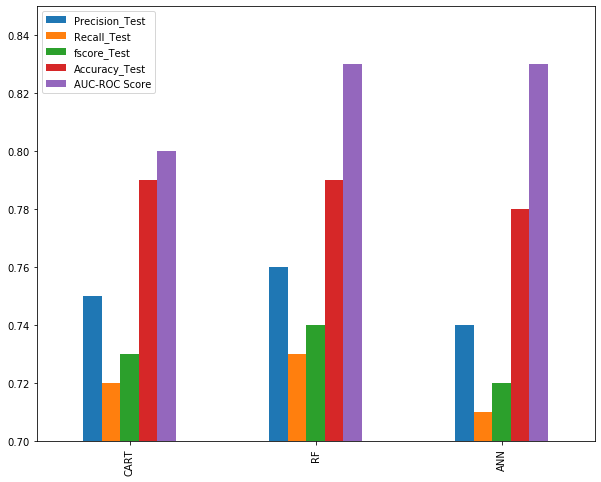

In [238]:
round(Class_Report_with_outlier_Test,2).plot(kind='bar',figsize=(10,8))
plt.ylim([0.7,0.85])
plt.legend( loc='best')

### Extracting the Accuracy, precision, Recall, F1 Score for Test and Train Data for Dataset without Outlier

In [239]:
precision_Train_CART1,recall_Train_CART1,fscore_Train_CART1,support_Train_CART1 =score(target_train1, target_train_predict_CART1,average='macro')

In [240]:
precision_Train_RF1,recall_Train_RF1,fscore_Train_RF1,support_Train_RF1 =score(target_train1, target_train_predict_RF1,average='macro')

In [241]:
precision_Train_ANN1,recall_Train_ANN1,fscore_Train_ANN1,support_Train_ANN1 =score(target_train1, target_train_predict_MLP1,average='macro')

In [242]:
## Extracting for the Test Data

In [243]:
precision_Test_CART1,recall_Test_CART1,fscore_Test_CART1,support_Test_CART1 =score(target_test1, target_test_predict_CART1,average='macro')

In [244]:
precision_Test_RF1,recall_Test_RF1,fscore_Test_RF1,support_Test_RF1 =score(target_test1, target_test_predict_RF1,average='macro')

In [245]:
precision_Test_ANN1,recall_Test_ANN1,fscore_Test_ANN1,support_Test_ANN1 =score(target_test1, target_test_predict_MLP1,average='macro')

In [246]:
# Creating DataFrame of Classification Report using 3 models for the Train datset without Outliers
index3 = ['CART', 'RF', 'ANN']
column3 = ['Precision_Train','Recall_Train','fscore_Train','Accuracy_Train','AUC-ROC Score']
Class_Report_without_outlier_Train = pd.DataFrame(data = [[precision_Train_CART1,recall_Train_CART1,fscore_Train_CART1,CART_TRAIN1, auc_train_CART1],
                                                      [precision_Train_RF1,recall_Train_RF1,fscore_Train_RF1,RF_TRAIN1,auc_train_RF1],
                                                      [precision_Train_ANN1,recall_Train_ANN1,fscore_Train_ANN1,ANN_TRAIN1,auc_train_ANN1]], columns = column3, index= index3)

In [247]:
round(Class_Report_without_outlier_Train,2)

,Precision_Train,Recall_Train,fscore_Train,Accuracy_Train,AUC-ROC Score
CART,0.77,0.75,0.76,0.80,0.87
RF,0.76,0.73,0.74,0.79,0.84
ANN,0.75,0.73,0.74,0.78,0.84


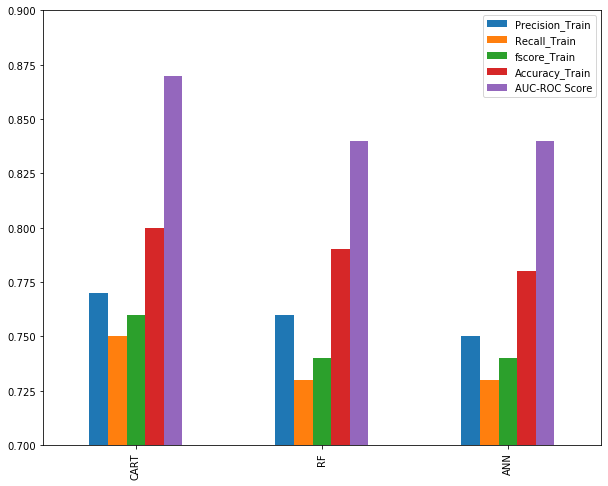

In [260]:
round(Class_Report_without_outlier_Train,2).plot(kind='bar',figsize=(10,8))
plt.ylim([0.7,0.90])
plt.legend( loc='best')

In [249]:
# Creating DataFrame of Classification Report using 3 models for the Test datset without Outliers
index4 = ['CART', 'RF', 'ANN']
column4 = ['Precision_Train','Recall_Train','fscore_Train','Accuracy_Train', 'AUC-ROC Score']
Class_Report_without_outlier_Test = pd.DataFrame(data = [[precision_Test_CART1,recall_Test_CART1,fscore_Test_CART1,CART_TEST1,auc_test_CART1],
                                                      [precision_Test_RF1,recall_Test_RF1,fscore_Test_RF1,RF_TEST1,auc_test_RF1],
                                                      [precision_Test_ANN1,recall_Test_ANN1,fscore_Test_ANN1,ANN_TEST1,auc_test_ANN1]], columns = column4, index= index4)

In [250]:
round(Class_Report_without_outlier_Test,2)

,Precision_Train,Recall_Train,fscore_Train,Accuracy_Train,AUC-ROC Score
CART,0.72,0.70,0.71,0.76,0.77
RF,0.77,0.73,0.75,0.80,0.83
ANN,0.76,0.73,0.74,0.79,0.82


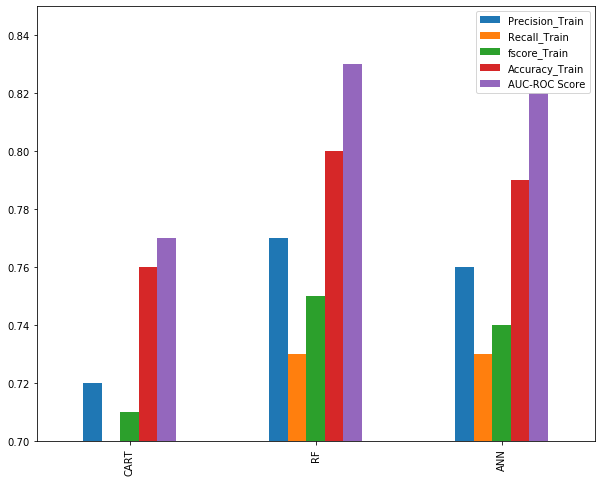

In [251]:
round(Class_Report_without_outlier_Test,2).plot(kind='bar',figsize=(10,8))
plt.ylim([0.7,0.85])
plt.legend( loc='best')

### Improving the Recall parameters by changing probability threshold

In [252]:
# We see that RF is comparatively performing better, however the Recall for 0 in case of RF is not balanced.
# Lets try to change the threshold for that.

# Train and test prediction for Dataset with Outliers for RF

target_train_predictprob_RF = best_grid_RF.predict_proba(x_train)
target_test_predictprob_RF = best_grid_RF.predict_proba(x_test)

In [253]:
target_train_predictprob_RF

array([[0.60176681, 0.39823319],
       [0.39649632, 0.60350368],
       [0.84260324, 0.15739676],
       ...,
       [0.9451756 , 0.0548244 ],
       [0.75302211, 0.24697789],
       [0.66094351, 0.33905649]])

In [254]:
target_test_predictprob_RF

array([[0.80860826, 0.19139174],
       [0.49559404, 0.50440596],
       [0.9635296 , 0.0364704 ],
       ...,
       [0.91045336, 0.08954664],
       [0.62136424, 0.37863576],
       [0.69496154, 0.30503846]])

In [255]:
target_train_predict_RF_changed_threshold = np.where(target_train_predictprob_RF[:,1]>0.30,1,0)
target_test_predict_RF_changed_threshold = np.where(target_test_predictprob_RF[:,1]>0.30,1,0)

In [256]:
target_train_predict_RF_changed_threshold

array([1, 1, 0, ..., 0, 0, 1])

In [257]:
target_test_predict_RF_changed_threshold

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,

In [261]:
# Generating the Classification report with new threshold for train and test
print('Classification report for Train data')
print(classification_report(target_train, target_train_predict_RF_changed_threshold))
print('======================================')
print('Classification report for Test data')
print(classification_report(target_test, target_test_predict_RF_changed_threshold))

Classification report for Train data
              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1345
           1       0.60      0.78      0.68       655

    accuracy                           0.76      2000
   macro avg       0.74      0.76      0.74      2000
weighted avg       0.79      0.76      0.77      2000

Classification report for Test data
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       599
           1       0.56      0.75      0.64       259

    accuracy                           0.75       858
   macro avg       0.72      0.75      0.73       858
weighted avg       0.78      0.75      0.76       858



<span style="color:blue; font-family:Calibri; text-align:center; font-size:2em;"> ****2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations**** </span>


In [259]:
# The insights and business recommendations are explained in the Business report